In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import numpy as np
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
#from sklearn.metrics import 

from sklearn.metrics import confusion_matrix


In [2]:
# Open Earthchem dataset
df = pd.read_csv('/content/drive/MyDrive/earthchem_download_95122.txt', delimiter = "\t")
df

,SAMPLE ID,IGSN,SOURCE,REFERENCE,CRUISE ID,LATITUDE,LONGITUDE,LOC PREC,MIN AGE,AGE,MAX AGE,MATERIAL,TYPE,COMPOSITION,ROCK NAME,MINERAL,SIO2,TIO2,AL2O3,CR2O3,FE2O3,FE2O3T,FEO,FEOT,NIO,MNO,MGO,CAO,NA2O,K2O,P2O5,BAO,LOI,H2O,H2O_M,H2O_P,SO3,V2O3,ZNO,FE,...,INDIUM,K,LI,MG.1,MN.1,MO,NA,NB,NI.1,P,PB,PD,RB,RE,S.1,SB,SC,SE,SN,SR,TA,TE,TH,TI,TL,U,V,W,Y,ZN.1,ZR,TI.1,AS.2,AS.3,GER.1,H2O_M.1,H2O_P.1,H2O_M.2,H2O_P.2,INDIUM.1
0,080385-4,NaN,GEOROC,"HICKEY-VARGAS, R.; HOLBIK, S.; TORMEY, D. R.; ...",NaN,-41.1000,-72.4930,0.01,NaN,NaN,NaN,igneous,volcanic,felsic,dacite,NaN,69.144,0.565,14.590,NaN,NaN,NaN,NaN,4.261,NaN,0.081,1.111,3.544,4.402,2.141,0.162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,11,NaN,18.9,NaN,69.1,NaN,NaN,NaN,11.9,NaN,NaN,190.0,0.50,NaN,8.60,NaN,NaN,NaN,43.0,NaN,42.0,62,282.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,230483-3,NaN,GEOROC,"HICKEY-VARGAS, R.; HOLBIK, S.; TORMEY, D. R.; ...",NaN,-41.1000,-72.4930,0.01,NaN,NaN,NaN,igneous,volcanic,felsic,dacite,NaN,63.541,0.796,16.427,NaN,NaN,NaN,NaN,5.973,NaN,0.121,1.732,5.136,4.562,1.460,0.252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,10,NaN,15.8,NaN,45.6,NaN,NaN,NaN,15.8,NaN,NaN,294.0,0.30,NaN,4.30,NaN,NaN,NaN,76.0,NaN,33.0,101,195.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,PU-02-34,NaN,GEOROC,"SINGER, B. S.; JICHA, B. R.; HARPER, M. A.; NA...",NaN,-40.5088,-72.2060,0.01,NaN,NaN,NaN,igneous,volcanic,felsic,dacite,NaN,70.931,0.340,13.794,NaN,NaN,NaN,NaN,4.671,NaN,0.140,0.310,1.771,5.182,2.791,0.070,NaN,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,27,NaN,14.0,NaN,62.0,NaN,NaN,0.5,NaN,NaN,NaN,138.0,0.47,NaN,8.30,NaN,NaN,2.24,NaN,NaN,53.7,96,307.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,PU-02-25,NaN,GEOROC,"SINGER, B. S.; JICHA, B. R.; HARPER, M. A.; NA...",NaN,-40.5275,-72.1812,0.01,NaN,NaN,NaN,igneous,volcanic,felsic,dacite,NaN,70.047,0.688,14.039,NaN,NaN,NaN,NaN,4.367,NaN,0.110,0.638,2.154,5.195,2.612,0.150,NaN,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.9,NaN,NaN,23.0,NaN,73.0,NaN,NaN,0.7,NaN,NaN,NaN,161.0,0.55,NaN,9.18,NaN,NaN,2.55,14.0,NaN,54.7,119,342.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,PU-02-20,NaN,GEOROC,"SINGER, B. S.; JICHA, B. R.; HARPER, M. A.; NA...",NaN,-40.5675,-72.1743,0.01,NaN,NaN,NaN,igneous,volcanic,felsic,dacite,NaN,69.367,0.531,14.150,NaN,NaN,NaN,NaN,5.167,NaN,0.150,0.471,2.213,5.167,2.664,0.120,NaN,< 0.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.7,NaN,NaN,32.0,NaN,66.0,NaN,NaN,0.7,NaN,NaN,NaN,197.0,0.48,NaN,8.82,NaN,NaN,2.37,NaN,NaN,39.8,144,308.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3058,DBF-03-05,NaN,GEOROC,"HORA, J. M.; SINGER, B. S.; WÖRNER, G., 2007",NaN,-18.1958,-69.2527,0.01,NaN,NaN,NaN,igneous,volcanic,felsic,dacite,NaN,64.904,0.834,16.277,NaN,NaN,NaN,NaN,3.854,NaN,0.061,1.801,3.835,4.568,3.540,0.326,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3059,DBF04-6,NaN,GEOROC,"JICHA, B. R.; LAABS, B. J. C.; HORA, J. M.; SI...",NaN,-18.1928,-69.2434,0.01,NaN,NaN,NaN,igneous,volcanic,felsic,rhyodacite,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3060,DBF04-5,NaN,GEOROC,"JICHA, B. R.; LAABS, B. J. C.; HORA, J. M.; SI...",NaN,-18.1929,-69.2433,0.01,NaN,NaN,NaN,igneous,volcanic,felsic,rhyodacite,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3063 entries, 0 to 3062
Columns: 151 entries, SAMPLE ID to INDIUM.1
dtypes: float64(133), object(18)
memory usage: 3.5+ MB


In [5]:
df.info

<bound method DataFrame.info of       SAMPLE ID  IGSN  SOURCE  ... H2O_M.2 H2O_P.2  INDIUM.1
0      080385-4   NaN  GEOROC  ...     NaN     NaN       NaN
1      230483-3   NaN  GEOROC  ...     NaN     NaN       NaN
2      PU-02-34   NaN  GEOROC  ...     NaN     NaN       NaN
3      PU-02-25   NaN  GEOROC  ...     NaN     NaN       NaN
4      PU-02-20   NaN  GEOROC  ...     NaN     NaN       NaN
...         ...   ...     ...  ...     ...     ...       ...
3058  DBF-03-05   NaN  GEOROC  ...     NaN     NaN       NaN
3059    DBF04-6   NaN  GEOROC  ...     NaN     NaN       NaN
3060    DBF04-5   NaN  GEOROC  ...     NaN     NaN       NaN
3061    CHO 099   NaN  GEOROC  ...     NaN     0.0       NaN
3062    LAU-2/2   NaN  GEOROC  ...     NaN     NaN       NaN

[3063 rows x 151 columns]>

In [6]:
df.describe()

,IGSN,LATITUDE,LONGITUDE,LOC PREC,MIN AGE,AGE,MAX AGE,MINERAL,SIO2,TIO2,AL2O3,CR2O3,FE2O3,FE2O3T,FEO,FEOT,NIO,MNO,MGO,CAO,NA2O,K2O,P2O5,BAO,H2O,H2O_M,H2O_P,SO3,V2O3,ZNO,FE,MN,CD,AS,AG,S,AL,CA,MG,SR87_SR86,...,HF,HG,I,INDIUM,K,LI,MG.1,MN.1,MO,NA,NB,P,PB,PD,RB,RE,S.1,SB,SE,SN,SR,TA,TE,TH,TI,TL,U,V,W,Y,ZR,TI.1,AS.2,AS.3,GER.1,H2O_M.1,H2O_P.1,H2O_M.2,H2O_P.2,INDIUM.1
count,0.0,3063.000000,3063.000000,3063.000000,1352.000000,1440.000000,1352.000000,0.0,2140.000000,2137.000000,2140.000000,50.000000,0.0,0.0,0.0,2139.000000,36.000000,2071.000000,2135.000000,2138.000000,2139.000000,2140.000000,2021.000000,21.000000,407.000000,81.000000,163.000000,93.000000,6.000000,6.000000,45.000000,42.000000,128.000000,239.000000,48.000000,118.000000,3.000000,188.000000,35.000000,437.000000,...,1265.000000,8.000000,3.000000,3.0,173.000000,406.000000,35.000000,42.000000,446.000000,39.000000,1492.000000,6.000000,1212.000000,8.000000,1870.000000,29.00000,118.000000,216.000000,7.000000,371.000000,1937.000000,1032.000000,10.000000,1532.000000,200.000000,260.000000,1322.000000,1141.000000,174.000000,1508.000000,1647.000000,200.000000,239.000000,239.000000,33.000000,81.000000,163.000000,81.000000,163.000000,3.0
mean,NaN,-29.436414,-69.961676,0.009968,40.972882,54.259535,66.329437,NaN,69.727827,0.506845,15.185684,0.016800,NaN,NaN,NaN,3.059633,0.000556,0.079324,1.080590,2.651464,3.906095,3.659449,0.163692,0.070952,0.622728,0.562716,0.966994,0.025495,0.020000,0.013333,551.876889,525.720355,5.734669,18.374184,23.258042,903.933044,6.600000,8870.662394,0.638857,0.708078,...,4.755757,0.765000,0.233333,0.0,9002.366393,56.800848,0.638857,525.720355,2.319761,16107.528205,13.723870,0.123167,54.236654,477.384625,143.529576,0.15069,903.933044,3.498287,0.785714,19.396011,356.174083,2.317409,6.905000,13.618918,828.254428,0.711842,4.735756,64.047744,38.858900,22.371591,190.392557,828.254428,18.374184,18.374184,3.537576,0.562716,0.966994,0.562716,0.966994,0.0
std,NaN,9.817008,2.227382,0.000567,258.564503,320.506284,396.412106,NaN,4.586499,0.295716,1.462794,0.047998,NaN,NaN,NaN,1.654797,0.003333,0.067451,0.883058,1.492672,1.059775,1.279555,0.098009,0.149429,0.784611,0.535546,0.875199,0.049122,0.030984,0.021602,1209.718221,484.696550,45.393418,24.401248,104.394142,4298.612288,1.252996,6398.272334,0.429519,0.008010,...,2.023469,1.958826,0.230940,0.0,18580.009643,178.105044,0.429519,484.696550,2.971864,32305.797197,11.926424,0.087133,400.240897,166.091912,110.000859,0.08122,4298.612288,17.552937,1.214398,35.542882,276.220171,29.631188,3.625114,8.147341,890.055116,0.466646,3.997264,47.985276,93.900342,14.976922,151.644587,890.055116,24.401248,24.401248,4.166317,0.535546,0.875199,0.535546,0.875199,0.0
min,NaN,-54.800000,-78.518000,0.000010,-0.002000,-19.300000,-0.000409,NaN,36.782000,0.002000,1.759000,0.000000,NaN,NaN,NaN,0.108000,0.000000,0.004000,0.010000,0.010000,0.063000,0.009000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.082622,0.000000,0.000000,0.000000,0.000000,5.300000,0.050000,0.030000,0.703330,...,0.086978,0.000000,0.100000,0.0,0.480000,2.400000,0.030000,0.082622,0.000000,0.200000,0.000000,0.009000,0.000000,250.757000,0.300000,0.04400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.650000,0.000000,0.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005000,0.000000,0.000000,0.700000,0.000000,0.000000,0.000000,0.000000,0.0
25%,NaN,-38.769400,-71.699050,0.010000,-0.000001,-0.000001,-0.000001,NaN,66.144000,0.287000,14.236750,0.000000,NaN,NaN,NaN,1.614500,0.000000,0.050000,0.373500,1.404500,3.264000,2.844000,0.090000,0.000000,0.143843,0.200000,0.210000,0.005070,0.000000,0.000000,1.500000,200.000000,0.065888,8.000000,0.000000,0.010000,6.000000,8332.380000,0.300000,0.704390,...,3.260000,0.000000,0.100000,0.0,2.480000,19.100000,0.300000,200.000000,1.150462,1.000000,8.000000,0.057500,13.000000,357.909250,84.000000,0.09100,0.010000,0.597500,0.000000,1.890000,168.000000,0.600000,6.577500,8.000000,655.512500,0.490000,2.10

In [7]:
df.keys()

Index(['SAMPLE ID', 'IGSN', 'SOURCE', 'REFERENCE', 'CRUISE ID', 'LATITUDE',
       'LONGITUDE', 'LOC PREC', 'MIN AGE', 'AGE',
       ...
       'ZR', 'TI.1', 'AS.2', 'AS.3', 'GER.1', 'H2O_M.1', 'H2O_P.1', 'H2O_M.2',
       'H2O_P.2', 'INDIUM.1'],
      dtype='object', length=151)

In [8]:
# Checking the first 5 rows of the dataset
df.head()

,SAMPLE ID,IGSN,SOURCE,REFERENCE,CRUISE ID,LATITUDE,LONGITUDE,LOC PREC,MIN AGE,AGE,MAX AGE,MATERIAL,TYPE,COMPOSITION,ROCK NAME,MINERAL,SIO2,TIO2,AL2O3,CR2O3,FE2O3,FE2O3T,FEO,FEOT,NIO,MNO,MGO,CAO,NA2O,K2O,P2O5,BAO,LOI,H2O,H2O_M,H2O_P,SO3,V2O3,ZNO,FE,...,INDIUM,K,LI,MG.1,MN.1,MO,NA,NB,NI.1,P,PB,PD,RB,RE,S.1,SB,SC,SE,SN,SR,TA,TE,TH,TI,TL,U,V,W,Y,ZN.1,ZR,TI.1,AS.2,AS.3,GER.1,H2O_M.1,H2O_P.1,H2O_M.2,H2O_P.2,INDIUM.1
0,080385-4,NaN,GEOROC,"HICKEY-VARGAS, R.; HOLBIK, S.; TORMEY, D. R.; ...",NaN,-41.1000,-72.4930,0.01,NaN,NaN,NaN,igneous,volcanic,felsic,dacite,NaN,69.144,0.565,14.590,NaN,NaN,NaN,NaN,4.261,NaN,0.081,1.111,3.544,4.402,2.141,0.162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,11,NaN,18.9,NaN,69.1,NaN,NaN,NaN,11.9,NaN,NaN,190.0,0.50,NaN,8.60,NaN,NaN,NaN,43.0,NaN,42.0,62,282.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,230483-3,NaN,GEOROC,"HICKEY-VARGAS, R.; HOLBIK, S.; TORMEY, D. R.; ...",NaN,-41.1000,-72.4930,0.01,NaN,NaN,NaN,igneous,volcanic,felsic,dacite,NaN,63.541,0.796,16.427,NaN,NaN,NaN,NaN,5.973,NaN,0.121,1.732,5.136,4.562,1.460,0.252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,10,NaN,15.8,NaN,45.6,NaN,NaN,NaN,15.8,NaN,NaN,294.0,0.30,NaN,4.30,NaN,NaN,NaN,76.0,NaN,33.0,101,195.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,PU-02-34,NaN,GEOROC,"SINGER, B. S.; JICHA, B. R.; HARPER, M. A.; NA...",NaN,-40.5088,-72.2060,0.01,NaN,NaN,NaN,igneous,volcanic,felsic,dacite,NaN,70.931,0.340,13.794,NaN,NaN,NaN,NaN,4.671,NaN,0.140,0.310,1.771,5.182,2.791,0.070,NaN,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,27,NaN,14.0,NaN,62.0,NaN,NaN,0.5,NaN,NaN,NaN,138.0,0.47,NaN,8.30,NaN,NaN,2.24,NaN,NaN,53.7,96,307.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,PU-02-25,NaN,GEOROC,"SINGER, B. S.; JICHA, B. R.; HARPER, M. A.; NA...",NaN,-40.5275,-72.1812,0.01,NaN,NaN,NaN,igneous,volcanic,felsic,dacite,NaN,70.047,0.688,14.039,NaN,NaN,NaN,NaN,4.367,NaN,0.110,0.638,2.154,5.195,2.612,0.150,NaN,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.9,NaN,NaN,23.0,NaN,73.0,NaN,NaN,0.7,NaN,NaN,NaN,161.0,0.55,NaN,9.18,NaN,NaN,2.55,14.0,NaN,54.7,119,342.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,PU-02-20,NaN,GEOROC,"SINGER, B. S.; JICHA, B. R.; HARPER, M. A.; NA...",NaN,-40.5675,-72.1743,0.01,NaN,NaN,NaN,igneous,volcanic,felsic,dacite,NaN,69.367,0.531,14.150,NaN,NaN,NaN,NaN,5.167,NaN,0.150,0.471,2.213,5.167,2.664,0.120,NaN,< 0.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.7,NaN,NaN,32.0,NaN,66.0,NaN,NaN,0.7,NaN,NaN,NaN,197.0,0.48,NaN,8.82,NaN,NaN,2.37,NaN,NaN,39.8,144,308.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#Checking the last 5 rows of the dataset

df.tail()

,SAMPLE ID,IGSN,SOURCE,REFERENCE,CRUISE ID,LATITUDE,LONGITUDE,LOC PREC,MIN AGE,AGE,MAX AGE,MATERIAL,TYPE,COMPOSITION,ROCK NAME,MINERAL,SIO2,TIO2,AL2O3,CR2O3,FE2O3,FE2O3T,FEO,FEOT,NIO,MNO,MGO,CAO,NA2O,K2O,P2O5,BAO,LOI,H2O,H2O_M,H2O_P,SO3,V2O3,ZNO,FE,...,INDIUM,K,LI,MG.1,MN.1,MO,NA,NB,NI.1,P,PB,PD,RB,RE,S.1,SB,SC,SE,SN,SR,TA,TE,TH,TI,TL,U,V,W,Y,ZN.1,ZR,TI.1,AS.2,AS.3,GER.1,H2O_M.1,H2O_P.1,H2O_M.2,H2O_P.2,INDIUM.1
3058,DBF-03-05,NaN,GEOROC,"HORA, J. M.; SINGER, B. S.; WÖRNER, G., 2007",NaN,-18.1958,-69.2527,0.01,NaN,NaN,NaN,igneous,volcanic,felsic,dacite,NaN,64.904,0.834,16.277,NaN,NaN,NaN,NaN,3.854,NaN,0.061,1.801,3.835,4.568,3.540,0.326,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3059,DBF04-6,NaN,GEOROC,"JICHA, B. R.; LAABS, B. J. C.; HORA, J. M.; SI...",NaN,-18.1928,-69.2434,0.01,NaN,NaN,NaN,igneous,volcanic,felsic,rhyodacite,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3060,DBF04-5,NaN,GEOROC,"JICHA, B. R.; LAABS, B. J. C.; HORA, J. M.; SI...",NaN,-18.1929,-69.2433,0.01,NaN,NaN,NaN,igneous,volcanic,felsic,rhyodacite,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3061,CHO 099,NaN,GEOROC,"MAMANI, M.; WÖRNER, G.; SEMPERE, T., 2010",NaN,-18.3014,-69.2431,0.01,2.6,12.80,23.0,igneous,volcanic,felsic,dacite,NaN,66.728,0.555,17.025,NaN,NaN,NaN,NaN,3.542,NaN,0.030,0.807,3.845,4.087,3.199,0.182,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,12,NaN,NaN,NaN,61.0,NaN,NaN,NaN,19.65,NaN,NaN,508.0,0.20,NaN,5.00,NaN,NaN,1.00,177.0,NaN,21.0,NaN,101.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
3062,LAU-2/2,NaN,GEOROC,"MAMANI, M.; WÖRNER, G.; SEMPERE, T., 2010",NaN,-18.2667,-69.3500,0.01,2.6,3.95,5.3,igneous,volcanic,felsic,rhyolite,NaN,75.179,0.129,13.810,NaN,NaN,NaN,NaN,0.850,NaN,0.072,0.145,1.007,3.738,5.051,0.019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,3,NaN,15.0,NaN,94.0,NaN,NaN,NaN,3.3,NaN,NaN,1125.0,1.43,NaN,20.17,NaN,NaN,3.63,31.0,NaN,21.0,NaN,150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Each row has something that is missing
data_new = df.dropna()
data_new

,SAMPLE ID,IGSN,SOURCE,REFERENCE,CRUISE ID,LATITUDE,LONGITUDE,LOC PREC,MIN AGE,AGE,MAX AGE,MATERIAL,TYPE,COMPOSITION,ROCK NAME,MINERAL,SIO2,TIO2,AL2O3,CR2O3,FE2O3,FE2O3T,FEO,FEOT,NIO,MNO,MGO,CAO,NA2O,K2O,P2O5,BAO,LOI,H2O,H2O_M,H2O_P,SO3,V2O3,ZNO,FE,...,INDIUM,K,LI,MG.1,MN.1,MO,NA,NB,NI.1,P,PB,PD,RB,RE,S.1,SB,SC,SE,SN,SR,TA,TE,TH,TI,TL,U,V,W,Y,ZN.1,ZR,TI.1,AS.2,AS.3,GER.1,H2O_M.1,H2O_P.1,H2O_M.2,H2O_P.2,INDIUM.1


In [11]:
df.describe()

,IGSN,LATITUDE,LONGITUDE,LOC PREC,MIN AGE,AGE,MAX AGE,MINERAL,SIO2,TIO2,AL2O3,CR2O3,FE2O3,FE2O3T,FEO,FEOT,NIO,MNO,MGO,CAO,NA2O,K2O,P2O5,BAO,H2O,H2O_M,H2O_P,SO3,V2O3,ZNO,FE,MN,CD,AS,AG,S,AL,CA,MG,SR87_SR86,...,HF,HG,I,INDIUM,K,LI,MG.1,MN.1,MO,NA,NB,P,PB,PD,RB,RE,S.1,SB,SE,SN,SR,TA,TE,TH,TI,TL,U,V,W,Y,ZR,TI.1,AS.2,AS.3,GER.1,H2O_M.1,H2O_P.1,H2O_M.2,H2O_P.2,INDIUM.1
count,0.0,3063.000000,3063.000000,3063.000000,1352.000000,1440.000000,1352.000000,0.0,2140.000000,2137.000000,2140.000000,50.000000,0.0,0.0,0.0,2139.000000,36.000000,2071.000000,2135.000000,2138.000000,2139.000000,2140.000000,2021.000000,21.000000,407.000000,81.000000,163.000000,93.000000,6.000000,6.000000,45.000000,42.000000,128.000000,239.000000,48.000000,118.000000,3.000000,188.000000,35.000000,437.000000,...,1265.000000,8.000000,3.000000,3.0,173.000000,406.000000,35.000000,42.000000,446.000000,39.000000,1492.000000,6.000000,1212.000000,8.000000,1870.000000,29.00000,118.000000,216.000000,7.000000,371.000000,1937.000000,1032.000000,10.000000,1532.000000,200.000000,260.000000,1322.000000,1141.000000,174.000000,1508.000000,1647.000000,200.000000,239.000000,239.000000,33.000000,81.000000,163.000000,81.000000,163.000000,3.0
mean,NaN,-29.436414,-69.961676,0.009968,40.972882,54.259535,66.329437,NaN,69.727827,0.506845,15.185684,0.016800,NaN,NaN,NaN,3.059633,0.000556,0.079324,1.080590,2.651464,3.906095,3.659449,0.163692,0.070952,0.622728,0.562716,0.966994,0.025495,0.020000,0.013333,551.876889,525.720355,5.734669,18.374184,23.258042,903.933044,6.600000,8870.662394,0.638857,0.708078,...,4.755757,0.765000,0.233333,0.0,9002.366393,56.800848,0.638857,525.720355,2.319761,16107.528205,13.723870,0.123167,54.236654,477.384625,143.529576,0.15069,903.933044,3.498287,0.785714,19.396011,356.174083,2.317409,6.905000,13.618918,828.254428,0.711842,4.735756,64.047744,38.858900,22.371591,190.392557,828.254428,18.374184,18.374184,3.537576,0.562716,0.966994,0.562716,0.966994,0.0
std,NaN,9.817008,2.227382,0.000567,258.564503,320.506284,396.412106,NaN,4.586499,0.295716,1.462794,0.047998,NaN,NaN,NaN,1.654797,0.003333,0.067451,0.883058,1.492672,1.059775,1.279555,0.098009,0.149429,0.784611,0.535546,0.875199,0.049122,0.030984,0.021602,1209.718221,484.696550,45.393418,24.401248,104.394142,4298.612288,1.252996,6398.272334,0.429519,0.008010,...,2.023469,1.958826,0.230940,0.0,18580.009643,178.105044,0.429519,484.696550,2.971864,32305.797197,11.926424,0.087133,400.240897,166.091912,110.000859,0.08122,4298.612288,17.552937,1.214398,35.542882,276.220171,29.631188,3.625114,8.147341,890.055116,0.466646,3.997264,47.985276,93.900342,14.976922,151.644587,890.055116,24.401248,24.401248,4.166317,0.535546,0.875199,0.535546,0.875199,0.0
min,NaN,-54.800000,-78.518000,0.000010,-0.002000,-19.300000,-0.000409,NaN,36.782000,0.002000,1.759000,0.000000,NaN,NaN,NaN,0.108000,0.000000,0.004000,0.010000,0.010000,0.063000,0.009000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.082622,0.000000,0.000000,0.000000,0.000000,5.300000,0.050000,0.030000,0.703330,...,0.086978,0.000000,0.100000,0.0,0.480000,2.400000,0.030000,0.082622,0.000000,0.200000,0.000000,0.009000,0.000000,250.757000,0.300000,0.04400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.650000,0.000000,0.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005000,0.000000,0.000000,0.700000,0.000000,0.000000,0.000000,0.000000,0.0
25%,NaN,-38.769400,-71.699050,0.010000,-0.000001,-0.000001,-0.000001,NaN,66.144000,0.287000,14.236750,0.000000,NaN,NaN,NaN,1.614500,0.000000,0.050000,0.373500,1.404500,3.264000,2.844000,0.090000,0.000000,0.143843,0.200000,0.210000,0.005070,0.000000,0.000000,1.500000,200.000000,0.065888,8.000000,0.000000,0.010000,6.000000,8332.380000,0.300000,0.704390,...,3.260000,0.000000,0.100000,0.0,2.480000,19.100000,0.300000,200.000000,1.150462,1.000000,8.000000,0.057500,13.000000,357.909250,84.000000,0.09100,0.010000,0.597500,0.000000,1.890000,168.000000,0.600000,6.577500,8.000000,655.512500,0.490000,2.10

In [12]:
# Drop rows with no silica values 
# To see if a sample is obsidian, we need to know their silica values 

In [13]:
df.dropna(subset=['SIO2'])

,SAMPLE ID,IGSN,SOURCE,REFERENCE,CRUISE ID,LATITUDE,LONGITUDE,LOC PREC,MIN AGE,AGE,MAX AGE,MATERIAL,TYPE,COMPOSITION,ROCK NAME,MINERAL,SIO2,TIO2,AL2O3,CR2O3,FE2O3,FE2O3T,FEO,FEOT,NIO,MNO,MGO,CAO,NA2O,K2O,P2O5,BAO,LOI,H2O,H2O_M,H2O_P,SO3,V2O3,ZNO,FE,...,INDIUM,K,LI,MG.1,MN.1,MO,NA,NB,NI.1,P,PB,PD,RB,RE,S.1,SB,SC,SE,SN,SR,TA,TE,TH,TI,TL,U,V,W,Y,ZN.1,ZR,TI.1,AS.2,AS.3,GER.1,H2O_M.1,H2O_P.1,H2O_M.2,H2O_P.2,INDIUM.1
0,080385-4,NaN,GEOROC,"HICKEY-VARGAS, R.; HOLBIK, S.; TORMEY, D. R.; ...",NaN,-41.1000,-72.4930,0.01,NaN,NaN,NaN,igneous,volcanic,felsic,dacite,NaN,69.144,0.565,14.590,NaN,NaN,NaN,NaN,4.261,NaN,0.081,1.111,3.544,4.402,2.141,0.162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,11,NaN,18.9,NaN,69.1,NaN,NaN,NaN,11.9,NaN,NaN,190.0,0.50,NaN,8.60,NaN,NaN,NaN,43.0,NaN,42.0,62,282.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,230483-3,NaN,GEOROC,"HICKEY-VARGAS, R.; HOLBIK, S.; TORMEY, D. R.; ...",NaN,-41.1000,-72.4930,0.01,NaN,NaN,NaN,igneous,volcanic,felsic,dacite,NaN,63.541,0.796,16.427,NaN,NaN,NaN,NaN,5.973,NaN,0.121,1.732,5.136,4.562,1.460,0.252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,10,NaN,15.8,NaN,45.6,NaN,NaN,NaN,15.8,NaN,NaN,294.0,0.30,NaN,4.30,NaN,NaN,NaN,76.0,NaN,33.0,101,195.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,PU-02-34,NaN,GEOROC,"SINGER, B. S.; JICHA, B. R.; HARPER, M. A.; NA...",NaN,-40.5088,-72.2060,0.01,NaN,NaN,NaN,igneous,volcanic,felsic,dacite,NaN,70.931,0.340,13.794,NaN,NaN,NaN,NaN,4.671,NaN,0.140,0.310,1.771,5.182,2.791,0.070,NaN,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,27,NaN,14.0,NaN,62.0,NaN,NaN,0.5,NaN,NaN,NaN,138.0,0.47,NaN,8.30,NaN,NaN,2.24,NaN,NaN,53.7,96,307.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,PU-02-25,NaN,GEOROC,"SINGER, B. S.; JICHA, B. R.; HARPER, M. A.; NA...",NaN,-40.5275,-72.1812,0.01,NaN,NaN,NaN,igneous,volcanic,felsic,dacite,NaN,70.047,0.688,14.039,NaN,NaN,NaN,NaN,4.367,NaN,0.110,0.638,2.154,5.195,2.612,0.150,NaN,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.9,NaN,NaN,23.0,NaN,73.0,NaN,NaN,0.7,NaN,NaN,NaN,161.0,0.55,NaN,9.18,NaN,NaN,2.55,14.0,NaN,54.7,119,342.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,PU-02-20,NaN,GEOROC,"SINGER, B. S.; JICHA, B. R.; HARPER, M. A.; NA...",NaN,-40.5675,-72.1743,0.01,NaN,NaN,NaN,igneous,volcanic,felsic,dacite,NaN,69.367,0.531,14.150,NaN,NaN,NaN,NaN,5.167,NaN,0.150,0.471,2.213,5.167,2.664,0.120,NaN,< 0.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.7,NaN,NaN,32.0,NaN,66.0,NaN,NaN,0.7,NaN,NaN,NaN,197.0,0.48,NaN,8.82,NaN,NaN,2.37,NaN,NaN,39.8,144,308.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3056,AJO 017,NaN,GEOROC,"MAMANI, M.; WÖRNER, G.; SEMPERE, T., 2010",NaN,-18.2167,-69.2125,0.01,2.6,12.80,23.0,igneous,volcanic,felsic,rhyolite,NaN,74.796,0.274,13.367,NaN,NaN,NaN,NaN,1.418,NaN,0.071,0.478,1.078,3.680,4.808,0.030,NaN,NaN,NaN,NaN,0.79,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,15,NaN,NaN,NaN,40.4,NaN,NaN,NaN,30.5,NaN,NaN,512.6,1.50,NaN,4.00,NaN,NaN,0.90,251.0,NaN,20.0,NaN,73.0,NaN,NaN,NaN,NaN,NaN,0.79,NaN,0.79,NaN
3057,AJO017,NaN,GEOROC,"DAVIDSON, J. P.; MCMILLAN, N. J.; MOORBATH, S....",NaN,-18.2458,-69.2194,0.01,NaN,NaN,NaN,igneous,volcanic,felsic,rhyolite,NaN,75.237,0.258,13.388,NaN,NaN,NaN,NaN,1.419,NaN,0.072,0.381,1.051,3.545,4.607,0.041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,19,NaN,NaN,NaN,146.0,NaN,NaN,NaN,NaN,NaN,NaN,147.0,1.06,NaN,16.30,NaN,NaN,2.20,12.0,NaN,17.0,44,121.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3058,DBF-03-05,NaN,GEOROC,"HORA, J. M.; SINGER, B. S.; WÖRNER, G., 2007",NaN,-18.1958,-69.2527,0.01,NaN,NaN,NaN,igneous,volcanic,felsic,dacite,NaN,64.904,0.834,16.277,NaN

In [14]:
# Drop columns with less than 50% data 

limitPer = len(df) * .50
df = df.dropna(thresh=limitPer, axis=1)
df.columns


Index(['SAMPLE ID', 'SOURCE', 'REFERENCE', 'LATITUDE', 'LONGITUDE', 'LOC PREC',
       'MATERIAL', 'TYPE', 'COMPOSITION', 'ROCK NAME', 'SIO2', 'TIO2', 'AL2O3',
       'FEOT', 'MNO', 'MGO', 'CAO', 'NA2O', 'K2O', 'P2O5', 'BA', 'RB', 'SR',
       'TH', 'ZR'],
      dtype='object')

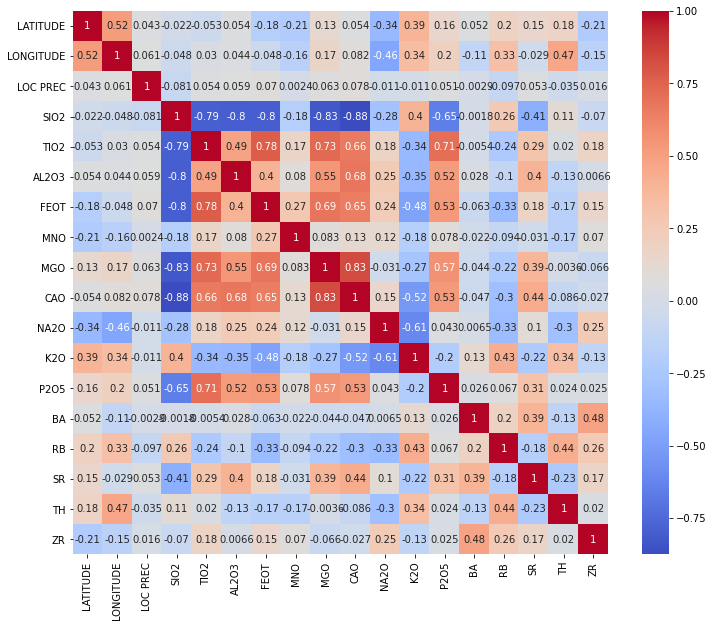

In [15]:
# Heatmap 

plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap="coolwarm")
plt.show()

# For starters, we see that with silica, we have high negative correlations
# with TiO2, Al2O3, FeOT, MgO, and CaO

In [16]:
# Mini Test:
# Took a random paper as a target and saw if we could identify the most informative features looking at the 
# 5 negative correlated features
# Change target to 1 and 0

data_baby = df
target = {'RODRIGUEZ, C.; SELLES, D.; DUNGAN, M. A.; LANGMUIR, C. H.; LEEMAN, W. P., 2007':1,
          ' ':0}

data_baby['target']= data_baby['REFERENCE'].map(target)

# Missing values are given a '?'. First replace them with np.NaN to facilitate removing them with pandas:
data_baby['target'] = data_baby['target'].fillna(0)

data_baby = data_baby.dropna()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [17]:
# Get 5 most informative features

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 42)
#Transforming data using RFE


X = data_baby[['SIO2','TIO2','AL2O3','FEOT','MGO','CAO', 'NA2O']]
y = data_baby['target']


X

,SIO2,TIO2,AL2O3,FEOT,MGO,CAO,NA2O
0,69.144,0.565,14.590,4.261,1.111,3.544,4.402
1,63.541,0.796,16.427,5.973,1.732,5.136,4.562
2,70.931,0.340,13.794,4.671,0.310,1.771,5.182
3,70.047,0.688,14.039,4.367,0.638,2.154,5.195
4,69.367,0.531,14.150,5.167,0.471,2.213,5.167
...,...,...,...,...,...,...,...
3055,75.549,0.205,13.303,1.201,0.185,0.893,3.880
3056,74.796,0.274,13.367,1.418,0.478,1.078,3.680
3057,75.237,0.258,13.388,1.419,0.381,1.051,3.545
3061,66.728,0.555,17.025,3.542,0.807,3.845,4.087


In [18]:
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True]
[1 1 1 1 1 1 1]


In [19]:
# # of features
nof_list=np.arange(1,4)            
high_score=0

# Store the optimum features
nof=0           
score_list =[]


In [20]:

for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                        test_size = 0.3,
                                                        random_state = 42)
    
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
        
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

# Optimum features is 3 
# but score is extremely weak... But is this due to the negative correlation? or that this method is trash?

Optimum number of features: 3
Score with 3 features: 0.051561


In [21]:
# List the 5 best features in a row

cols = list(X.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 10)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y) 

#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

# Makes sense Ti is second because it doesn't like to move out of rocks 


Index(['SIO2', 'TIO2', 'AL2O3', 'FEOT', 'MGO', 'CAO', 'NA2O'], dtype='object')


In [22]:
# Plot values on a Map

In [23]:
!pip install geopandas

import geopandas
from shapely.geos import lgeos
import fiona
from shapely.geometry import Polygon

# Sample dataset with long lat to plot
data_new = df[:5]

# select multiple columns
data_new = data_new.loc[:5,['LATITUDE', 'LONGITUDE', 'ZR']]
print(data_new)


   LATITUDE  LONGITUDE     ZR
0  -41.1000   -72.4930  282.0
1  -41.1000   -72.4930  195.0
2  -40.5088   -72.2060  307.0
3  -40.5275   -72.1812  342.0
4  -40.5675   -72.1743  308.0


In [24]:
gdf = geopandas.GeoDataFrame(data_new, geometry=geopandas.points_from_xy(data_new['LONGITUDE'],data_new['LATITUDE']))
print(gdf.head)

<bound method NDFrame.head of    LATITUDE  LONGITUDE     ZR                     geometry
0  -41.1000   -72.4930  282.0  POINT (-72.49300 -41.10000)
1  -41.1000   -72.4930  195.0  POINT (-72.49300 -41.10000)
2  -40.5088   -72.2060  307.0  POINT (-72.20600 -40.50880)
3  -40.5275   -72.1812  342.0  POINT (-72.18120 -40.52750)
4  -40.5675   -72.1743  308.0  POINT (-72.17430 -40.56750)>


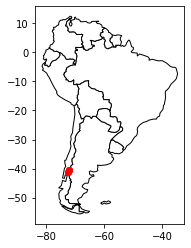

In [25]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
ax = world[world.continent == 'South America'].plot(
    color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='red')

plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

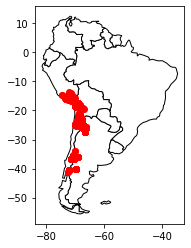

In [26]:
# Plotting top 20 papers with the most samples on map

target = {'MAMANI, M.; WÖRNER, G.; SEMPERE, T., 2010':1,
          'FOLKES, C. B.; DE SILVA, S. L.; WRIGHT, H. M. N.; CAS, R. A. F., 2011':2,
          'KAY, S. M.; COIRA, B. L.; WÖRNER, G.; KAY, R. W.; SINGER, B. S., 2011':3,
          'RICHARDS, J. P.; ULLRICH, T. D.; KERRICH, R., 2006':4,
          'LEBTI, P. P.; THOURET, J.-C.; WÖRNER, G.; FORNARI, M., 2006':5,
          'WRIGHT, H. M. N.; FOLKES, C. B.; CAS, R. A. F.; CASHMAN, K. V., 2011':6,
          'RUPRECHT, P.; BERGANTZ, G. W.; COOPER, KARI M.; HILDRETH, R. A., 2012':7,
          'MATTHEWS, S. J.; SPARKS, R. S. J.; GARDEWEG, M. C., 1999':8,
          'GUZMAN, S. R.; PETRINOVIC, I. A.; BROD, J. A.; HONGN, F. D.; SEGGIARO, R. E.; MONTERO, C.; CARNIEL, R.; DANTAS, E. I.; SUDO, M., 2011':9,
          'GERLACH, D. C.; FREY, F. A.; MORENO-ROA, HUGO; LOPEZ-ESCOBAR, L., 1988':10,
          'SINGER, B. S.; JICHA, B. R.; HARPER, M. A.; NARANJO, J. A.; LARA, L. E.; MORENO-ROA, HUGO, 2008':11,
          'HICKEY-VARGAS, R.; HOLBIK, S.; TORMEY, D. R.; FREY, F. A.; MORENO-ROA, HUGO, 2016':12,
          'GODOY, B.; WÖRNER, G.; KOJIMA, S.; AGUILERA, F.; SIMON, K.; HARTMANN, G., 2014':13,
          'HASCHKE, M.; SIEBEL, W.; GÜNTHER, A.; SCHEUBER, E., 2002':14,
          'JICHA, B. R.; SINGER, B. S.; BEARD, B. L.; JOHNSON, CLARK M.; MORENO-ROA, HUGO; NARANJO, J. A., 2007':15,
          'ULRICH, T.; HEINRICH, C. A., 2001':16,
          'KLEIMAN, L. E.; JAPAS, M. S., 2009':17,
          'BENEDINI, L.; GREGORI, D. A., 2013':18,
          'RICHARDS, J. P.; BOYCE, A. J.; PRINGLE, M. S., 2001':19,
          'HIGGINS, M. D.; VOOS, S.; VANDER AUWERA, J., 2015':20
          }

data_baby = df

data_baby['target']= data_baby['REFERENCE'].map(target)

# Missing values are given a '?'. First replace them with np.NaN to facilitate removing them with pandas:
data_baby['target'] = data_baby['target'].fillna(0)
# Make target column int
data_baby['target'] = data_baby['target'].astype(float).astype(int)

# Drop targets that are not in top 20 references
data_baby =data_baby[data_baby['target'] >=1]

# select multiple columns
data_baby = data_baby.loc[:,['LATITUDE', 'LONGITUDE', 'target']]
#print(data_baby)

gdf = geopandas.GeoDataFrame(data_baby, geometry=geopandas.points_from_xy(data_baby['LONGITUDE'],data_baby['LATITUDE']))
#print(gdf.head)

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
ax = world[world.continent == 'South America'].plot(
    color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='red')

plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

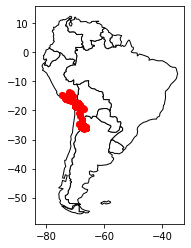

In [27]:
# Plotting top 10 papers with the most samples on map

target = {'MAMANI, M.; WÖRNER, G.; SEMPERE, T., 2010':1,
          'FOLKES, C. B.; DE SILVA, S. L.; WRIGHT, H. M. N.; CAS, R. A. F., 2011':2,
          'KAY, S. M.; COIRA, B. L.; WÖRNER, G.; KAY, R. W.; SINGER, B. S., 2011':3,
          'RICHARDS, J. P.; ULLRICH, T. D.; KERRICH, R., 2006':4,
          'LEBTI, P. P.; THOURET, J.-C.; WÖRNER, G.; FORNARI, M., 2006':5,
          'WRIGHT, H. M. N.; FOLKES, C. B.; CAS, R. A. F.; CASHMAN, K. V., 2011':6,
          #'RUPRECHT, P.; BERGANTZ, G. W.; COOPER, KARI M.; HILDRETH, R. A., 2012':7,
          'MATTHEWS, S. J.; SPARKS, R. S. J.; GARDEWEG, M. C., 1999':8,
          'GUZMAN, S. R.; PETRINOVIC, I. A.; BROD, J. A.; HONGN, F. D.; SEGGIARO, R. E.; MONTERO, C.; CARNIEL, R.; DANTAS, E. I.; SUDO, M., 2011':9,
          #'GERLACH, D. C.; FREY, F. A.; MORENO-ROA, HUGO; LOPEZ-ESCOBAR, L., 1988':10
          }

data_baby = df

data_baby['target']= data_baby['REFERENCE'].map(target)

# Missing values are given a '?'. First replace them with np.NaN to facilitate removing them with pandas:
data_baby['target'] = data_baby['target'].fillna(0)
# Make target column int
data_baby['target'] = data_baby['target'].astype(float).astype(int)

# Drop targets that are not in top 10 references
data_baby =data_baby[data_baby['target'] >=1]

# select multiple columns
data_baby = data_baby.loc[:,['LATITUDE', 'LONGITUDE', 'target']]
#print(data_baby)

gdf = geopandas.GeoDataFrame(data_baby, geometry=geopandas.points_from_xy(data_baby['LONGITUDE'],data_baby['LATITUDE']))
#print(gdf.head)

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
ax = world[world.continent == 'South America'].plot(
    color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='red')

plt.show()

In [28]:
# Pairplot cluster ( Peru/Bolivia/Chile)
import seaborn as sns

data_baby = df

data_baby['target']= data_baby['REFERENCE'].map(target)

# Missing values are given a '?'. First replace them with np.NaN to facilitate removing them with pandas:
data_baby['target'] = data_baby['target'].fillna(0)
# Make target column int
data_baby['target'] = data_baby['target'].astype(float).astype(int)

# Drop targets that are not in top 8 references
data_baby =data_baby[data_baby['target'] >=1]
data_baby

#sns.pairplot(data_baby,hue = 'ROCK NAME',diag_kind="hist")


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

,SAMPLE ID,SOURCE,REFERENCE,LATITUDE,LONGITUDE,LOC PREC,MATERIAL,TYPE,COMPOSITION,ROCK NAME,SIO2,TIO2,AL2O3,FEOT,MNO,MGO,CAO,NA2O,K2O,P2O5,BA,RB,SR,TH,ZR,target
15,AMPATO PUMICE,GEOROC,"MAMANI, M.; WÖRNER, G.; SEMPERE, T., 2010",-15.9000,-72.1333,0.01,igneous,volcanic,felsic,rhyolite,75.606,0.174,13.348,0.967,0.051,0.209,0.907,2.920,5.788,0.030,931.0,59.0,726.0,3.73103,152.0,1
16,PIG-00-33,GEOROC,"MAMANI, M.; WÖRNER, G.; SEMPERE, T., 2010",-16.3550,-72.1308,0.01,igneous,volcanic,felsic,rhyolite,68.573,0.406,15.915,2.759,0.089,2.147,3.482,3.290,3.215,0.125,1288.0,132.0,135.0,4.02857,306.0,1
17,AND-99-08,GEOROC,"MAMANI, M.; WÖRNER, G.; SEMPERE, T., 2010",-15.5330,-72.3167,0.01,igneous,volcanic,felsic,dacite,68.140,0.595,15.390,3.134,0.046,1.134,2.916,4.020,4.404,0.222,778.0,75.0,626.0,5.18248,202.0,1
23,PIG-03-123,GEOROC,"MAMANI, M.; WÖRNER, G.; SEMPERE, T., 2010",-15.5689,-73.0842,0.01,igneous,volcanic,felsic,rhyolite,68.918,0.539,15.315,2.905,0.066,1.076,2.815,4.325,3.849,0.190,1048.0,113.0,384.0,4.79955,178.0,1
25,BAR-03-01,GEOROC,"MAMANI, M.; WÖRNER, G.; SEMPERE, T., 2010",-15.0786,-72.7183,0.01,igneous,volcanic,felsic,dacite,67.175,0.658,15.711,3.380,0.089,0.987,2.659,4.381,4.733,0.227,847.0,31.0,782.0,2.28148,133.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3032,CG 327,GEOROC,"FOLKES, C. B.; DE SILVA, S. L.; WRIGHT, H. M. ...",-25.8500,-66.8100,0.01,igneous,volcanic,felsic,rhyodacite,69.618,0.581,15.226,3.005,0.040,0.771,2.604,3.406,4.508,0.240,516.7,261.3,294.4,31.10000,173.3,2
3054,DBF 111,GEOROC,"MAMANI, M.; WÖRNER, G.; SEMPERE, T., 2010",-18.1972,-69.2719,0.01,igneous,volcanic,felsic,rhyolite,72.940,0.351,13.739,1.860,0.040,0.703,1.666,4.095,4.506,0.100,301.0,88.0,99.0,12.91540,118.0,1
3056,AJO 017,GEOROC,"MAMANI, M.; WÖRNER, G.; SEMPERE, T., 2010",-18.2167,-69.2125,0.01,igneous,volcanic,felsic,rhyolite,74.796,0.274,13.367,1.418,0.071,0.478,1.078,3.680,4.808,0.030,513.0,40.4,512.6,4.00000,73.0,1
3061,CHO 099,GEOROC,"MAMANI, M.; WÖRNER, G.; SEMPERE, T., 2010",-18.3014,-69.2431,0.01,igneous,volcanic,felsic,dacite,66.728,0.555,17.025,3.542,0.030,0.807,3.845,4.087,3.199,0.182,766.0,61.0,508.0,5.00000,101.0,1


In [29]:
# Finding an Algorithm for Peru/Bolivia/Chile cluster 
data_baby = data_baby.dropna()
y = data_baby['target']
X = data_baby[['SIO2','TIO2','AL2O3','FEOT','MGO','CAO', 'NA2O']]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)


In [30]:
scaler = StandardScaler()
X_stand = scaler.fit_transform(X_train)

In [31]:
pca = PCA(n_components = 7)
X_yes = pca.fit_transform(X_stand)
pca.explained_variance_ratio_.sum()

0.9999999999999998

In [32]:
# Run Decisiontree/ KNN/ LogReg
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

data_baby_dt = DecisionTreeClassifier()
data_baby_knn = KNeighborsClassifier()
data_baby_lr = LogisticRegression()

In [33]:
# Train All
data_baby_dt.fit(X_train,y_train)
data_baby_knn.fit(X_train,y_train)
#data_baby_lr.fit(X_train,y_train)

y_hat_dt = data_baby_dt.predict(X_test)
y_hat_knn = data_baby_knn.predict(X_test)
#y_hat_lr = data_baby_lr.predict(X_test)

In [34]:
# Get evaluations- Decision Tree was ok
from sklearn.metrics import classification_report,accuracy_score

print('Decision Tree Results')
print(f'accuracy={accuracy_score(y_test,y_hat_dt)}')
print(f'accuracy={classification_report(y_test,y_hat_dt)}')

Decision Tree Results
accuracy=0.6231884057971014
accuracy=              precision    recall  f1-score   support

           1       0.82      0.80      0.81        45
           2       0.59      0.52      0.55        25
           3       0.60      0.53      0.56        17
           4       0.46      0.43      0.44        14
           5       0.53      0.67      0.59        12
           6       0.17      0.22      0.19         9
           8       0.80      0.67      0.73         6
           9       0.67      0.80      0.73        10

    accuracy                           0.62       138
   macro avg       0.58      0.58      0.58       138
weighted avg       0.63      0.62      0.63       138



In [35]:
# Get evaluations- KNN is ok

print('KNN Results')
print(f'accuracy={accuracy_score(y_test,y_hat_knn)}')
print(f'accuracy={classification_report(y_test,y_hat_knn)}')


KNN Results
accuracy=0.5869565217391305
accuracy=              precision    recall  f1-score   support

           1       0.80      0.71      0.75        45
           2       0.55      0.48      0.51        25
           3       0.48      0.59      0.53        17
           4       0.46      0.43      0.44        14
           5       0.43      0.75      0.55        12
           6       0.14      0.11      0.12         9
           8       0.80      0.67      0.73         6
           9       0.78      0.70      0.74        10

    accuracy                           0.59       138
   macro avg       0.55      0.55      0.55       138
weighted avg       0.60      0.59      0.59       138



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

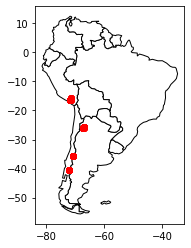

In [36]:
# Four separated samples 

# Plotting top 10 papers with the most samples on map

target = {#'MAMANI, M.; WÖRNER, G.; SEMPERE, T., 2010':1,
          'FOLKES, C. B.; DE SILVA, S. L.; WRIGHT, H. M. N.; CAS, R. A. F., 2011':2,
          #'KAY, S. M.; COIRA, B. L.; WÖRNER, G.; KAY, R. W.; SINGER, B. S., 2011':3,
          #'RICHARDS, J. P.; ULLRICH, T. D.; KERRICH, R., 2006':4,
          'LEBTI, P. P.; THOURET, J.-C.; WÖRNER, G.; FORNARI, M., 2006':5,
          #'WRIGHT, H. M. N.; FOLKES, C. B.; CAS, R. A. F.; CASHMAN, K. V., 2011':6,
          'RUPRECHT, P.; BERGANTZ, G. W.; COOPER, KARI M.; HILDRETH, R. A., 2012':7,
          #'MATTHEWS, S. J.; SPARKS, R. S. J.; GARDEWEG, M. C., 1999':8,
          #'GUZMAN, S. R.; PETRINOVIC, I. A.; BROD, J. A.; HONGN, F. D.; SEGGIARO, R. E.; MONTERO, C.; CARNIEL, R.; DANTAS, E. I.; SUDO, M., 2011':9,
          'GERLACH, D. C.; FREY, F. A.; MORENO-ROA, HUGO; LOPEZ-ESCOBAR, L., 1988':10
          }

data_baby = df

data_baby['target']= data_baby['REFERENCE'].map(target)

# Missing values are given a '?'. First replace them with np.NaN to facilitate removing them with pandas:
data_baby['target'] = data_baby['target'].fillna(0)
# Make target column int
data_baby['target'] = data_baby['target'].astype(float).astype(int)

# Drop targets that are not in top 10 references
data_baby =data_baby[data_baby['target'] >=1]

# select multiple columns
data_baby = data_baby.loc[:,['LATITUDE', 'LONGITUDE', 'target']]
#print(data_baby)

gdf = geopandas.GeoDataFrame(data_baby, geometry=geopandas.points_from_xy(data_baby['LONGITUDE'],data_baby['LATITUDE']))
#print(gdf.head)

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
ax = world[world.continent == 'South America'].plot(
    color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='red')

plt.show()

In [37]:
data_baby

,LATITUDE,LONGITUDE,target,geometry
186,-25.9800,-67.2100,2,POINT (-67.21000 -25.98000)
187,-25.9800,-67.2100,2,POINT (-67.21000 -25.98000)
188,-25.9800,-67.2100,2,POINT (-67.21000 -25.98000)
191,-25.9800,-67.2100,2,POINT (-67.21000 -25.98000)
192,-25.9800,-67.2100,2,POINT (-67.21000 -25.98000)
...,...,...,...,...
3027,-25.8500,-66.8100,2,POINT (-66.81000 -25.85000)
3029,-25.8500,-66.8100,2,POINT (-66.81000 -25.85000)
3030,-25.8500,-66.8100,2,POINT (-66.81000 -25.85000)
3031,-25.8536,-66.8245,2,POINT (-66.82450 -25.85360)


In [38]:
# Pairplot cluster ( Peru vs. southern Chile)
import seaborn as sns

data_baby = df

data_baby['target']= data_baby['REFERENCE'].map(target)

# Missing values are given a '?'. First replace them with np.NaN to facilitate removing them with pandas:
data_baby['target'] = data_baby['target'].fillna(0)
# Make target column int
data_baby['target'] = data_baby['target'].astype(float).astype(int)

# Drop targets that are not in top 8 references
data_baby =data_baby[data_baby['target'] >=1]
data_baby

#sns.pairplot(data_baby,hue = 'target',diag_kind="hist")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

,SAMPLE ID,SOURCE,REFERENCE,LATITUDE,LONGITUDE,LOC PREC,MATERIAL,TYPE,COMPOSITION,ROCK NAME,SIO2,TIO2,AL2O3,FEOT,MNO,MGO,CAO,NA2O,K2O,P2O5,BA,RB,SR,TH,ZR,target
186,CG 81A,GEOROC,"FOLKES, C. B.; DE SILVA, S. L.; WRIGHT, H. M. ...",-25.9800,-67.2100,0.01,igneous,volcanic,felsic,rhyodacite,68.089,0.531,16.421,2.904,0.04,1.111,3.304,3.805,3.605,0.19,436.0,204.8,338.9,17.9,148.9,2
187,REAL GRANDE WHITE,GEOROC,"FOLKES, C. B.; DE SILVA, S. L.; WRIGHT, H. M. ...",-25.9800,-67.2100,0.01,igneous,volcanic,felsic,rhyodacite,77.440,0.150,12.539,0.752,0.03,0.110,0.853,2.307,5.818,NaN,NaN,NaN,NaN,NaN,NaN,2
188,MIDDLE MERIHUACA GREY,GEOROC,"FOLKES, C. B.; DE SILVA, S. L.; WRIGHT, H. M. ...",-25.9800,-67.2100,0.01,igneous,volcanic,felsic,rhyodacite,78.932,0.110,12.405,0.310,0.03,0.040,0.770,1.701,5.702,NaN,NaN,NaN,NaN,NaN,NaN,2
191,MIDDLE MERIHUACA WHITE,GEOROC,"FOLKES, C. B.; DE SILVA, S. L.; WRIGHT, H. M. ...",-25.9800,-67.2100,0.01,igneous,volcanic,felsic,rhyodacite,77.684,0.150,13.097,0.340,0.03,0.060,0.940,2.300,5.399,NaN,NaN,NaN,NaN,NaN,NaN,2
192,PITAS WHITE,GEOROC,"FOLKES, C. B.; DE SILVA, S. L.; WRIGHT, H. M. ...",-25.9800,-67.2100,0.01,igneous,volcanic,felsic,rhyodacite,77.431,0.120,12.805,0.240,0.01,0.040,0.850,2.601,5.902,NaN,NaN,NaN,NaN,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3027,CG 125,GEOROC,"FOLKES, C. B.; DE SILVA, S. L.; WRIGHT, H. M. ...",-25.8500,-66.8100,0.01,igneous,volcanic,felsic,rhyodacite,70.000,0.540,14.900,2.800,0.05,1.110,2.700,3.100,4.600,0.20,506.0,253.9,269.7,28.6,169.7,2
3029,CG 140,GEOROC,"FOLKES, C. B.; DE SILVA, S. L.; WRIGHT, H. M. ...",-25.8500,-66.8100,0.01,igneous,volcanic,felsic,rhyodacite,69.921,0.610,14.804,3.001,0.05,1.190,2.801,3.401,4.001,0.22,282.1,255.7,264.1,30.8,169.0,2
3030,CG 218,GEOROC,"FOLKES, C. B.; DE SILVA, S. L.; WRIGHT, H. M. ...",-25.8500,-66.8100,0.01,igneous,volcanic,felsic,rhyodacite,70.393,0.590,14.599,2.900,0.05,1.160,2.600,3.300,4.200,0.21,253.5,325.2,243.7,31.1,179.8,2
3031,CG 227B,GEOROC,"FOLKES, C. B.; DE SILVA, S. L.; WRIGHT, H. M. ...",-25.8536,-66.8245,0.01,igneous,volcanic,felsic,rhyodacite,68.945,0.610,15.288,2.998,0.05,1.219,2.698,3.197,4.796,0.20,592.5,258.0,295.7,34.0,213.3,2


In [39]:
# Finding an Algorithm for Peru vs. Southern Chile 
data_baby = data_baby.dropna()
y = data_baby['target']
X = data_baby[['SIO2','TIO2','AL2O3','FEOT','MGO','CAO', 'NA2O']]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

len(X)

160

In [40]:
scaler = StandardScaler()
X_stand = scaler.fit_transform(X_train)

pca = PCA(n_components = 7)
X_yes = pca.fit_transform(X_stand)
pca.explained_variance_ratio_.sum()

1.0

In [41]:
# Run Decisiontree/ KNN/ LogReg
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

data_baby_dt = DecisionTreeClassifier()
data_baby_knn = KNeighborsClassifier()
data_baby_lr = LogisticRegression()

In [42]:
# Train All
data_baby_dt.fit(X_train,y_train)
data_baby_knn.fit(X_train,y_train)
#data_baby_lr.fit(X_train,y_train)

y_hat_dt = data_baby_dt.predict(X_test)
y_hat_knn = data_baby_knn.predict(X_test)
#y_hat_lr = data_baby_lr.predict(X_test)

In [43]:
# Get evaluations- Decision Tree was ok
from sklearn.metrics import classification_report,accuracy_score

print('Decision Tree Results')
print(f'accuracy={accuracy_score(y_test,y_hat_dt)}')
print(f'accuracy={classification_report(y_test,y_hat_dt)}')

Decision Tree Results
accuracy=0.9791666666666666
accuracy=              precision    recall  f1-score   support

           2       1.00      1.00      1.00        17
           5       1.00      1.00      1.00        14
           7       1.00      0.83      0.91         6
          10       0.92      1.00      0.96        11

    accuracy                           0.98        48
   macro avg       0.98      0.96      0.97        48
weighted avg       0.98      0.98      0.98        48



In [44]:
# Get evaluations- KNN is ok

print('KNN Results')
print(f'accuracy={accuracy_score(y_test,y_hat_knn)}')
print(f'accuracy={classification_report(y_test,y_hat_knn)}')


KNN Results
accuracy=0.9791666666666666
accuracy=              precision    recall  f1-score   support

           2       1.00      1.00      1.00        17
           5       0.93      1.00      0.97        14
           7       1.00      0.83      0.91         6
          10       1.00      1.00      1.00        11

    accuracy                           0.98        48
   macro avg       0.98      0.96      0.97        48
weighted avg       0.98      0.98      0.98        48



In [45]:
# Four separated

# Plotting 4 separated samples

target = {#'MAMANI, M.; WÖRNER, G.; SEMPERE, T., 2010':1,
          'FOLKES, C. B.; DE SILVA, S. L.; WRIGHT, H. M. N.; CAS, R. A. F., 2011':2,
          #'KAY, S. M.; COIRA, B. L.; WÖRNER, G.; KAY, R. W.; SINGER, B. S., 2011':3,
          #'RICHARDS, J. P.; ULLRICH, T. D.; KERRICH, R., 2006':4,
          'LEBTI, P. P.; THOURET, J.-C.; WÖRNER, G.; FORNARI, M., 2006':5,
          #'WRIGHT, H. M. N.; FOLKES, C. B.; CAS, R. A. F.; CASHMAN, K. V., 2011':6,
          'RUPRECHT, P.; BERGANTZ, G. W.; COOPER, KARI M.; HILDRETH, R. A., 2012':7,
          #'MATTHEWS, S. J.; SPARKS, R. S. J.; GARDEWEG, M. C., 1999':8,
          #'GUZMAN, S. R.; PETRINOVIC, I. A.; BROD, J. A.; HONGN, F. D.; SEGGIARO, R. E.; MONTERO, C.; CARNIEL, R.; DANTAS, E. I.; SUDO, M., 2011':9,
          'GERLACH, D. C.; FREY, F. A.; MORENO-ROA, HUGO; LOPEZ-ESCOBAR, L., 1988':10
          }

data_four = df

data_four['target']= data_four['REFERENCE'].map(target)

# Missing values are given a '?'. First replace them with np.NaN to facilitate removing them with pandas:
data_four['target'] = data_four['target'].fillna(0)
# Make target column int
data_four['target'] = data_four['target'].astype(float).astype(int)

# Drop targets that are not in top 8 references
data_four = data_four[data_four['target'] >=1]
data_four

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

,SAMPLE ID,SOURCE,REFERENCE,LATITUDE,LONGITUDE,LOC PREC,MATERIAL,TYPE,COMPOSITION,ROCK NAME,SIO2,TIO2,AL2O3,FEOT,MNO,MGO,CAO,NA2O,K2O,P2O5,BA,RB,SR,TH,ZR,target
186,CG 81A,GEOROC,"FOLKES, C. B.; DE SILVA, S. L.; WRIGHT, H. M. ...",-25.9800,-67.2100,0.01,igneous,volcanic,felsic,rhyodacite,68.089,0.531,16.421,2.904,0.04,1.111,3.304,3.805,3.605,0.19,436.0,204.8,338.9,17.9,148.9,2
187,REAL GRANDE WHITE,GEOROC,"FOLKES, C. B.; DE SILVA, S. L.; WRIGHT, H. M. ...",-25.9800,-67.2100,0.01,igneous,volcanic,felsic,rhyodacite,77.440,0.150,12.539,0.752,0.03,0.110,0.853,2.307,5.818,NaN,NaN,NaN,NaN,NaN,NaN,2
188,MIDDLE MERIHUACA GREY,GEOROC,"FOLKES, C. B.; DE SILVA, S. L.; WRIGHT, H. M. ...",-25.9800,-67.2100,0.01,igneous,volcanic,felsic,rhyodacite,78.932,0.110,12.405,0.310,0.03,0.040,0.770,1.701,5.702,NaN,NaN,NaN,NaN,NaN,NaN,2
191,MIDDLE MERIHUACA WHITE,GEOROC,"FOLKES, C. B.; DE SILVA, S. L.; WRIGHT, H. M. ...",-25.9800,-67.2100,0.01,igneous,volcanic,felsic,rhyodacite,77.684,0.150,13.097,0.340,0.03,0.060,0.940,2.300,5.399,NaN,NaN,NaN,NaN,NaN,NaN,2
192,PITAS WHITE,GEOROC,"FOLKES, C. B.; DE SILVA, S. L.; WRIGHT, H. M. ...",-25.9800,-67.2100,0.01,igneous,volcanic,felsic,rhyodacite,77.431,0.120,12.805,0.240,0.01,0.040,0.850,2.601,5.902,NaN,NaN,NaN,NaN,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3027,CG 125,GEOROC,"FOLKES, C. B.; DE SILVA, S. L.; WRIGHT, H. M. ...",-25.8500,-66.8100,0.01,igneous,volcanic,felsic,rhyodacite,70.000,0.540,14.900,2.800,0.05,1.110,2.700,3.100,4.600,0.20,506.0,253.9,269.7,28.6,169.7,2
3029,CG 140,GEOROC,"FOLKES, C. B.; DE SILVA, S. L.; WRIGHT, H. M. ...",-25.8500,-66.8100,0.01,igneous,volcanic,felsic,rhyodacite,69.921,0.610,14.804,3.001,0.05,1.190,2.801,3.401,4.001,0.22,282.1,255.7,264.1,30.8,169.0,2
3030,CG 218,GEOROC,"FOLKES, C. B.; DE SILVA, S. L.; WRIGHT, H. M. ...",-25.8500,-66.8100,0.01,igneous,volcanic,felsic,rhyodacite,70.393,0.590,14.599,2.900,0.05,1.160,2.600,3.300,4.200,0.21,253.5,325.2,243.7,31.1,179.8,2
3031,CG 227B,GEOROC,"FOLKES, C. B.; DE SILVA, S. L.; WRIGHT, H. M. ...",-25.8536,-66.8245,0.01,igneous,volcanic,felsic,rhyodacite,68.945,0.610,15.288,2.998,0.05,1.219,2.698,3.197,4.796,0.20,592.5,258.0,295.7,34.0,213.3,2


In [46]:
import plotly.express as px
from sklearn.decomposition import PCA

features = ['LATITUDE', 'LONGITUDE', 'SIO2', 'TIO2', 'AL2O3', 'FEOT', 'MNO', 'MGO',
       'CAO', 'NA2O', 'K2O', 'P2O5', 'BA', 'RB', 'SR', 'TH', 'ZR', 'target']

data_four= data_four.dropna()

X = data_four[features]

pca = PCA(n_components=2)
components = pca.fit_transform(X)

fig = px.scatter(components, x=0, y=1, color=data_four['target'])
fig.show()


In [47]:
# What Model should we use, KNN or DecisionTrees?

y = data_four['target']
X = data_four[['SIO2','TIO2','AL2O3','FEOT','MGO','CAO', 'NA2O']]

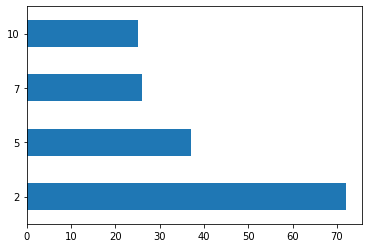

In [48]:
data_four['target'].value_counts()[:20].plot(kind='barh')

In [49]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)


In [50]:
scaler = StandardScaler()
X_stand = scaler.fit_transform(X_train)

In [51]:
pca = PCA(n_components = 7)

X_yes = pca.fit_transform(X_stand)

pca.explained_variance_ratio_.sum()

1.0

In [52]:
# Run Decisiontree/ KNN/ LogReg
data_baby_dt = DecisionTreeClassifier()
data_baby_knn = KNeighborsClassifier()
data_baby_lr = LogisticRegression()

In [53]:
# Train All
data_baby_dt.fit(X_train,y_train)
data_baby_knn.fit(X_train,y_train)
#data_baby_lr.fit(X_train,y_train)

y_hat_dt = data_baby_dt.predict(X_test)
y_hat_knn = data_baby_knn.predict(X_test)
#y_hat_lr = data_baby_lr.predict(X_test)

In [54]:
# Get evaluations- Decision Tree was ok
from sklearn.metrics import classification_report,accuracy_score

print('Decision Tree Results')
print(f'accuracy={accuracy_score(y_test,y_hat_dt)}')
print(f'accuracy={classification_report(y_test,y_hat_dt)}')

Decision Tree Results
accuracy=0.9791666666666666
accuracy=              precision    recall  f1-score   support

           2       1.00      1.00      1.00        17
           5       1.00      1.00      1.00        14
           7       1.00      0.83      0.91         6
          10       0.92      1.00      0.96        11

    accuracy                           0.98        48
   macro avg       0.98      0.96      0.97        48
weighted avg       0.98      0.98      0.98        48



In [55]:
# Get evaluations- KNN is ok

print('KNN Results')
print(f'accuracy={accuracy_score(y_test,y_hat_knn)}')
print(f'accuracy={classification_report(y_test,y_hat_knn)}')


KNN Results
accuracy=0.9791666666666666
accuracy=              precision    recall  f1-score   support

           2       1.00      1.00      1.00        17
           5       0.93      1.00      0.97        14
           7       1.00      0.83      0.91         6
          10       1.00      1.00      1.00        11

    accuracy                           0.98        48
   macro avg       0.98      0.96      0.97        48
weighted avg       0.98      0.98      0.98        48



In [56]:
#DBSCAN on 4 separated samples 

from sklearn import metrics

# Plotting 4 separated samples

target = {#'MAMANI, M.; WÖRNER, G.; SEMPERE, T., 2010':1,
          'FOLKES, C. B.; DE SILVA, S. L.; WRIGHT, H. M. N.; CAS, R. A. F., 2011':2,
          #'KAY, S. M.; COIRA, B. L.; WÖRNER, G.; KAY, R. W.; SINGER, B. S., 2011':3,
          #'RICHARDS, J. P.; ULLRICH, T. D.; KERRICH, R., 2006':4,
          'LEBTI, P. P.; THOURET, J.-C.; WÖRNER, G.; FORNARI, M., 2006':5,
          #'WRIGHT, H. M. N.; FOLKES, C. B.; CAS, R. A. F.; CASHMAN, K. V., 2011':6,
          'RUPRECHT, P.; BERGANTZ, G. W.; COOPER, KARI M.; HILDRETH, R. A., 2012':7,
          #'MATTHEWS, S. J.; SPARKS, R. S. J.; GARDEWEG, M. C., 1999':8,
          #'GUZMAN, S. R.; PETRINOVIC, I. A.; BROD, J. A.; HONGN, F. D.; SEGGIARO, R. E.; MONTERO, C.; CARNIEL, R.; DANTAS, E. I.; SUDO, M., 2011':9,
          'GERLACH, D. C.; FREY, F. A.; MORENO-ROA, HUGO; LOPEZ-ESCOBAR, L., 1988':10
          }

df = pd.read_csv('/content/drive/MyDrive/earthchem_download_95122.txt', delimiter = "\t")
limitPer = len(df) * .50
df = df.dropna(thresh=limitPer, axis=1)
df.columns

data_four = df

data_four['target']= data_four['REFERENCE'].map(target)

# Missing values are given a '?'. First replace them with np.NaN to facilitate removing them with pandas:
data_four['target'] = data_four['target'].fillna(0)
# Make target column int
data_four['target'] = data_four['target'].astype(float).astype(int)

# Drop targets that are not the 4 references
data_four = data_four[data_four['target'] >=1]
data_four

features = ['LATITUDE', 'LONGITUDE', 'SIO2', 'TIO2', 'AL2O3', 'FEOT', 'MNO', 'MGO',
       'CAO', 'NA2O', 'K2O', 'P2O5', 'BA', 'RB', 'SR', 'TH', 'ZR', 'target']

data_four= data_four.dropna()

X = data_four[features]
X = X.drop(['target'],axis = 1)
y = data_four['target']


# data

data_four_elements = data_four[features]
coordinates = data_four_elements[['LONGITUDE','LATITUDE']]
target = data_four_elements['target']

data_four_elements.dropna(subset=['SIO2', 'TIO2', 'AL2O3', 'FEOT', 'MNO', 'MGO',
       'CAO', 'NA2O', 'K2O', 'P2O5', 'BA', 'RB', 'SR', 'TH', 'ZR'])
print(data_four.shape)



(160, 26)


In [57]:
!pip install https://github.com/matplotlib/basemap/archive/master.zip
from mpl_toolkits.basemap import Basemap
from pylab import rcParams

  Using cached https://github.com/matplotlib/basemap/archive/master.zip
  Created wheel for basemap: filename=basemap-1.2.2+dev-cp37-cp37m-linux_x86_64.whl size=121759570 sha256=f38a0143d7fa70903f6059a4f4bfd5b585f80de3e3e19c07f47676d4059128e2
  Stored in directory: /tmp/pip-ephem-wheel-cache-ied8it1v/wheels/98/4a/fc/ce719b75d97e646645c225f3332b1b217536100314922e9572
Successfully built basemap


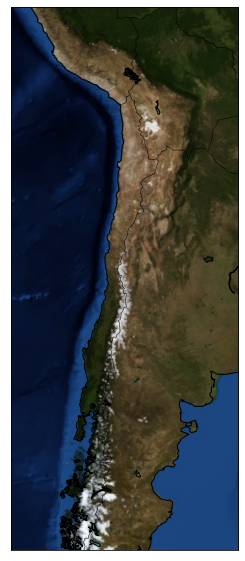

In [58]:
rcParams['figure.figsize'] = (14,10)


llon = -80
ulon = -60
llat = -50
ulat = -10

# selecting boundaries of the map from lat/ long 
data_four_elements = data_four_elements[(data_four_elements['LONGITUDE']> llon) & (data_four_elements['LONGITUDE'] < ulon)
                          & (data_four_elements['LATITUDE']> llat) & (data_four_elements['LATITUDE'] < ulat)]

my_map = Basemap(projection = 'merc',
                resolution = 'l', area_thresh = 500.0,
                llcrnrlon = llon, llcrnrlat = llat, # min long
                urcrnrlon = ulon, urcrnrlat = ulat) # max long
                      
my_map.drawcoastlines()
my_map.drawcountries()
my_map.drawlsmask(land_color = 'orange', ocean_color = 'skyblue')
my_map.bluemarble()

xs,ys = my_map(np.asarray(data_four_elements.LONGITUDE), np.asarray(data_four_elements.LATITUDE))
data_four_elements['xm']= xs.tolist()
data_four_elements['ym']= ys.tolist()

In [59]:
xs, ys = my_map(np.asarray(data_four_elements.LONGITUDE), 
                np.asarray(data_four_elements.LATITUDE))

In [60]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

geo_clus = data_four_elements[['SIO2', 'TIO2', 'AL2O3', 'FEOT', 'MNO', 'MGO',
       'CAO', 'NA2O', 'K2O', 'P2O5', 'BA', 'RB', 'SR', 'TH', 'ZR']]
geo_clus = StandardScaler().fit_transform(geo_clus)

db = DBSCAN(eps=0.3, min_samples=10).fit(geo_clus)
labels = db.labels_
print(labels[50:60])
print(labels)

realClusterNum = len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels))

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


In [61]:
set(labels)

{-1}

In [62]:
import numpy as np
from scipy.cluster.vq import kmeans,vq
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import geopandas as gpd


In [63]:
target = {'MAMANI, M.; WÖRNER, G.; SEMPERE, T., 2010':1,
          'FOLKES, C. B.; DE SILVA, S. L.; WRIGHT, H. M. N.; CAS, R. A. F., 2011':2,
          'KAY, S. M.; COIRA, B. L.; WÖRNER, G.; KAY, R. W.; SINGER, B. S., 2011':3,
          'RICHARDS, J. P.; ULLRICH, T. D.; KERRICH, R., 2006':4,
          'LEBTI, P. P.; THOURET, J.-C.; WÖRNER, G.; FORNARI, M., 2006':5,
          'WRIGHT, H. M. N.; FOLKES, C. B.; CAS, R. A. F.; CASHMAN, K. V., 2011':6,
          'RUPRECHT, P.; BERGANTZ, G. W.; COOPER, KARI M.; HILDRETH, R. A., 2012':7,
          'MATTHEWS, S. J.; SPARKS, R. S. J.; GARDEWEG, M. C., 1999':8,
          'GUZMAN, S. R.; PETRINOVIC, I. A.; BROD, J. A.; HONGN, F. D.; SEGGIARO, R. E.; MONTERO, C.; CARNIEL, R.; DANTAS, E. I.; SUDO, M., 2011':9,
          'GERLACH, D. C.; FREY, F. A.; MORENO-ROA, HUGO; LOPEZ-ESCOBAR, L., 1988':10,
          'SINGER, B. S.; JICHA, B. R.; HARPER, M. A.; NARANJO, J. A.; LARA, L. E.; MORENO-ROA, HUGO, 2008':11,
          'HICKEY-VARGAS, R.; HOLBIK, S.; TORMEY, D. R.; FREY, F. A.; MORENO-ROA, HUGO, 2016':12,
          'GODOY, B.; WÖRNER, G.; KOJIMA, S.; AGUILERA, F.; SIMON, K.; HARTMANN, G., 2014':13,
          'HASCHKE, M.; SIEBEL, W.; GÜNTHER, A.; SCHEUBER, E., 2002':14,
          'JICHA, B. R.; SINGER, B. S.; BEARD, B. L.; JOHNSON, CLARK M.; MORENO-ROA, HUGO; NARANJO, J. A., 2007':15,
          'ULRICH, T.; HEINRICH, C. A., 2001':16,
          'KLEIMAN, L. E.; JAPAS, M. S., 2009':17,
          'BENEDINI, L.; GREGORI, D. A., 2013':18,
          'RICHARDS, J. P.; BOYCE, A. J.; PRINGLE, M. S., 2001':19,
          'HIGGINS, M. D.; VOOS, S.; VANDER AUWERA, J., 2015':20
          }

data_twenty = df

data_twenty['target']= data_twenty['REFERENCE'].map(target)

# Missing values are given a '?'. First replace them with np.NaN to facilitate removing them with pandas:
data_twenty['target'] = data_twenty['target'].fillna(0)
# Make target column int
data_twenty['target'] = data_twenty['target'].astype(float).astype(int)

# Drop targets that are not the 4 references
data_twenty = data_twenty[data_twenty['target'] >=1]

data_twenty


,SAMPLE ID,SOURCE,REFERENCE,LATITUDE,LONGITUDE,LOC PREC,MATERIAL,TYPE,COMPOSITION,ROCK NAME,SIO2,TIO2,AL2O3,FEOT,MNO,MGO,CAO,NA2O,K2O,P2O5,BA,RB,SR,TH,ZR,target
0,080385-4,GEOROC,"HICKEY-VARGAS, R.; HOLBIK, S.; TORMEY, D. R.; ...",-41.1000,-72.4930,0.01,igneous,volcanic,felsic,dacite,69.144,0.565,14.590,4.261,0.081,1.111,3.544,4.402,2.141,0.162,550.0,69.1,190.0,8.6000,282.0,12
1,230483-3,GEOROC,"HICKEY-VARGAS, R.; HOLBIK, S.; TORMEY, D. R.; ...",-41.1000,-72.4930,0.01,igneous,volcanic,felsic,dacite,63.541,0.796,16.427,5.973,0.121,1.732,5.136,4.562,1.460,0.252,396.0,45.6,294.0,4.3000,195.0,12
2,PU-02-34,GEOROC,"SINGER, B. S.; JICHA, B. R.; HARPER, M. A.; NA...",-40.5088,-72.2060,0.01,igneous,volcanic,felsic,dacite,70.931,0.340,13.794,4.671,0.140,0.310,1.771,5.182,2.791,0.070,747.0,62.0,138.0,8.3000,307.0,11
3,PU-02-25,GEOROC,"SINGER, B. S.; JICHA, B. R.; HARPER, M. A.; NA...",-40.5275,-72.1812,0.01,igneous,volcanic,felsic,dacite,70.047,0.688,14.039,4.367,0.110,0.638,2.154,5.195,2.612,0.150,776.0,73.0,161.0,9.1800,342.0,11
4,PU-02-20,GEOROC,"SINGER, B. S.; JICHA, B. R.; HARPER, M. A.; NA...",-40.5675,-72.1743,0.01,igneous,volcanic,felsic,dacite,69.367,0.531,14.150,5.167,0.150,0.471,2.213,5.167,2.664,0.120,692.0,66.0,197.0,8.8200,308.0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3032,CG 327,GEOROC,"FOLKES, C. B.; DE SILVA, S. L.; WRIGHT, H. M. ...",-25.8500,-66.8100,0.01,igneous,volcanic,felsic,rhyodacite,69.618,0.581,15.226,3.005,0.040,0.771,2.604,3.406,4.508,0.240,516.7,261.3,294.4,31.1000,173.3,2
3054,DBF 111,GEOROC,"MAMANI, M.; WÖRNER, G.; SEMPERE, T., 2010",-18.1972,-69.2719,0.01,igneous,volcanic,felsic,rhyolite,72.940,0.351,13.739,1.860,0.040,0.703,1.666,4.095,4.506,0.100,301.0,88.0,99.0,12.9154,118.0,1
3056,AJO 017,GEOROC,"MAMANI, M.; WÖRNER, G.; SEMPERE, T., 2010",-18.2167,-69.2125,0.01,igneous,volcanic,felsic,rhyolite,74.796,0.274,13.367,1.418,0.071,0.478,1.078,3.680,4.808,0.030,513.0,40.4,512.6,4.0000,73.0,1
3061,CHO 099,GEOROC,"MAMANI, M.; WÖRNER, G.; SEMPERE, T., 2010",-18.3014,-69.2431,0.01,igneous,volcanic,felsic,dacite,66.728,0.555,17.025,3.542,0.030,0.807,3.845,4.087,3.199,0.182,766.0,61.0,508.0,5.0000,101.0,1


In [64]:
features = ['LATITUDE', 'LONGITUDE', 'SIO2', 'TIO2', 'AL2O3', 'FEOT', 'MNO', 'MGO',
       'CAO', 'NA2O', 'K2O', 'P2O5', 'BA', 'RB', 'SR', 'TH', 'ZR', 'target']

data_twenty = data_twenty.dropna()

X = data_twenty[features]
X = X.drop(['target'],axis = 1)
y = data_twenty['target']
y.unique()

array([12, 11, 15,  1,  3,  2,  6, 14, 10,  7, 20,  5, 17,  8, 13, 16,  9,
        4, 18, 19])

In [65]:
coordinates = data_twenty[['LATITUDE', 'LONGITUDE']]
coordinates

,LATITUDE,LONGITUDE
0,-41.1000,-72.4930
1,-41.1000,-72.4930
2,-40.5088,-72.2060
3,-40.5275,-72.1812
4,-40.5675,-72.1743
...,...,...
3032,-25.8500,-66.8100
3054,-18.1972,-69.2719
3056,-18.2167,-69.2125
3061,-18.3014,-69.2431


In [66]:
geo_df =gpd.GeoDataFrame(data_twenty.drop(['LONGITUDE', 'LATITUDE'], axis=1),
                          crs={'init': 'epsg:4326'})
                          #geometry=[Point(xy) for xy in zip(data_twenty.LONGITUDE, data_twenty.LATITUDE)])

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:53: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.



In [67]:
import numpy as np
from scipy.cluster.vq import kmeans,vq
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import geopandas as gpd

#import libpysal.weights.set_operations as Wsets
#from libpysal.weights import Queen, KNN
import seaborn 
import pandas
import geopandas 
import numpy
from sklearn.cluster import KMeans, AgglomerativeClustering
import matplotlib.pyplot as plt

In [68]:
cluster_variables = ['SIO2', 'TIO2', 'AL2O3', 'FEOT', 'MNO', 'MGO',
       'CAO', 'NA2O', 'K2O', 'P2O5', 'BA', 'RB', 'SR', 'TH', 'ZR']

data_twenty = data_twenty.dropna()

X = data_twenty[cluster_variables]
#X = X.drop(['target'],axis = 1)
y = data_twenty['target']
y.unique()
X

,SIO2,TIO2,AL2O3,FEOT,MNO,MGO,CAO,NA2O,K2O,P2O5,BA,RB,SR,TH,ZR
0,69.144,0.565,14.590,4.261,0.081,1.111,3.544,4.402,2.141,0.162,550.0,69.1,190.0,8.6000,282.0
1,63.541,0.796,16.427,5.973,0.121,1.732,5.136,4.562,1.460,0.252,396.0,45.6,294.0,4.3000,195.0
2,70.931,0.340,13.794,4.671,0.140,0.310,1.771,5.182,2.791,0.070,747.0,62.0,138.0,8.3000,307.0
3,70.047,0.688,14.039,4.367,0.110,0.638,2.154,5.195,2.612,0.150,776.0,73.0,161.0,9.1800,342.0
4,69.367,0.531,14.150,5.167,0.150,0.471,2.213,5.167,2.664,0.120,692.0,66.0,197.0,8.8200,308.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3032,69.618,0.581,15.226,3.005,0.040,0.771,2.604,3.406,4.508,0.240,516.7,261.3,294.4,31.1000,173.3
3054,72.940,0.351,13.739,1.860,0.040,0.703,1.666,4.095,4.506,0.100,301.0,88.0,99.0,12.9154,118.0
3056,74.796,0.274,13.367,1.418,0.071,0.478,1.078,3.680,4.808,0.030,513.0,40.4,512.6,4.0000,73.0
3061,66.728,0.555,17.025,3.542,0.030,0.807,3.845,4.087,3.199,0.182,766.0,61.0,508.0,5.0000,101.0


In [69]:
coordinates = data_twenty[['LATITUDE', 'LONGITUDE']]
coordinates

,LATITUDE,LONGITUDE
0,-41.1000,-72.4930
1,-41.1000,-72.4930
2,-40.5088,-72.2060
3,-40.5275,-72.1812
4,-40.5675,-72.1743
...,...,...
3032,-25.8500,-66.8100
3054,-18.1972,-69.2719
3056,-18.2167,-69.2125
3061,-18.3014,-69.2431


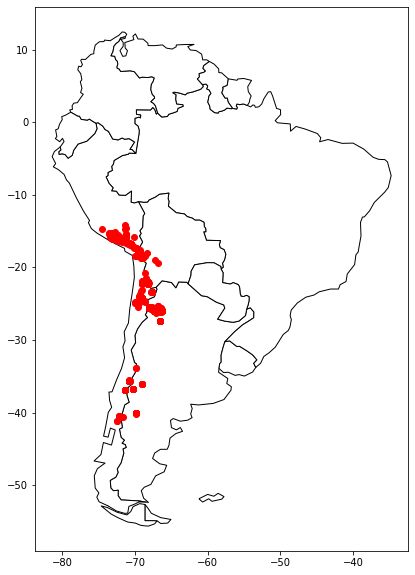

In [70]:
# Map

gdf = geopandas.GeoDataFrame(X, geometry=geopandas.points_from_xy(coordinates['LONGITUDE'],coordinates['LATITUDE']))
#print(gdf.head)

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
ax = world[world.continent == 'South America'].plot(
    color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='red')

plt.show()

In [71]:
# Initialise KMeans instance
kmeans = KMeans(n_clusters=4)

In [72]:
# Set the seed for reproducibility
numpy.random.seed(1234)
# Run K-Means algorithm
k5cls = kmeans.fit(X[cluster_variables])

In [73]:
k5cls.labels_

array([0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 3, 1, 3, 1, 3, 3, 0, 0, 0, 0, 0,
       3, 3, 3, 1, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 1, 3, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       3, 1, 1, 3, 0, 3, 3, 0, 3, 3, 0, 0, 1, 0, 0, 1, 1, 1, 3, 1, 0, 0,
       1, 0, 3, 1, 3, 3, 3, 3, 3, 0, 3, 3, 0, 1, 0, 3, 0, 0, 3, 3, 0, 3,
       3, 1, 3, 0, 3, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 3, 0, 0, 0, 0, 1, 3, 0, 3, 3, 3, 3, 0, 0,

In [74]:
gdf

,SIO2,TIO2,AL2O3,FEOT,MNO,MGO,CAO,NA2O,K2O,P2O5,BA,RB,SR,TH,ZR,geometry
0,69.144,0.565,14.590,4.261,0.081,1.111,3.544,4.402,2.141,0.162,550.0,69.1,190.0,8.6000,282.0,POINT (-72.49300 -41.10000)
1,63.541,0.796,16.427,5.973,0.121,1.732,5.136,4.562,1.460,0.252,396.0,45.6,294.0,4.3000,195.0,POINT (-72.49300 -41.10000)
2,70.931,0.340,13.794,4.671,0.140,0.310,1.771,5.182,2.791,0.070,747.0,62.0,138.0,8.3000,307.0,POINT (-72.20600 -40.50880)
3,70.047,0.688,14.039,4.367,0.110,0.638,2.154,5.195,2.612,0.150,776.0,73.0,161.0,9.1800,342.0,POINT (-72.18120 -40.52750)
4,69.367,0.531,14.150,5.167,0.150,0.471,2.213,5.167,2.664,0.120,692.0,66.0,197.0,8.8200,308.0,POINT (-72.17430 -40.56750)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3032,69.618,0.581,15.226,3.005,0.040,0.771,2.604,3.406,4.508,0.240,516.7,261.3,294.4,31.1000,173.3,POINT (-66.81000 -25.85000)
3054,72.940,0.351,13.739,1.860,0.040,0.703,1.666,4.095,4.506,0.100,301.0,88.0,99.0,12.9154,118.0,POINT (-69.27190 -18.19720)
3056,74.796,0.274,13.367,1.418,0.071,0.478,1.078,3.680,4.808,0.030,513.0,40.4,512.6,4.0000,73.0,POINT (-69.21250 -18.21670)
3061,66.728,0.555,17.025,3.542,0.030,0.807,3.845,4.087,3.199,0.182,766.0,61.0,508.0,5.0000,101.0,POINT (-69.24310 -18.30140)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



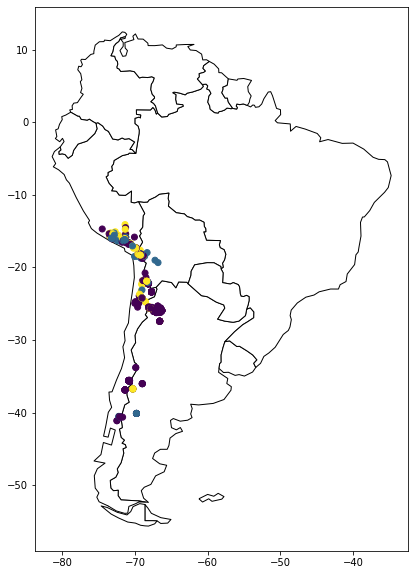

In [75]:
# Spatial Distribution of Clusters

# Assign labels to a column
X['k5cls'] = k5cls.labels_



# Map


gdf = geopandas.GeoDataFrame(X, geometry=geopandas.points_from_xy(coordinates['LONGITUDE'],coordinates['LATITUDE']))
#print(gdf.head)

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
ax = world[world.continent == 'South America'].plot(
    color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
gdf.plot(column = 'k5cls',ax=ax)

plt.show()

In [76]:
# Group data table by cluster label and count observations
k5sizes = X.groupby('k5cls').size()
k5sizes

k5cls
0    481
1    112
2      1
3     94
dtype: int64

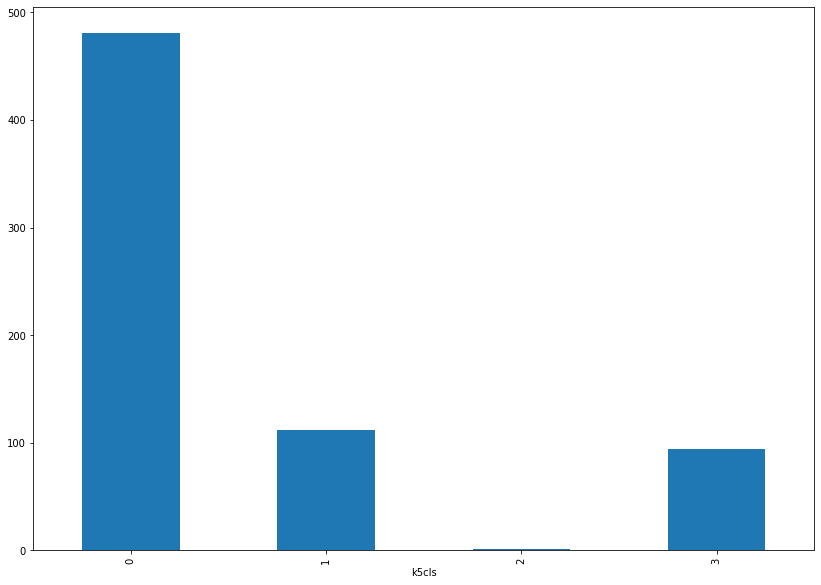

In [77]:
_ = k5sizes.plot.bar()

In [78]:
# Group table by cluster label, keep the variables used 
# for clustering, and obtain their descriptive summary
k5desc = gdf.groupby('k5cls')[cluster_variables].describe()
# Loop over each cluster and print a table with descriptives
for cluster in k5desc.T:
    print('\n\t---------\n\tCluster %i'%cluster)
    print(k5desc.T[cluster].unstack())


	---------
	Cluster 0
       count        mean         std  ...      50%      75%      max
SIO2   481.0   68.890247    3.372153  ...   68.744   69.954   81.971
TIO2   481.0    0.567455    0.185816  ...    0.587    0.652    1.080
AL2O3  481.0   15.259545    1.002352  ...   15.302   15.932   18.663
FEOT   481.0    3.329840    1.266724  ...    3.117    4.112    7.355
MNO    481.0    0.075792    0.096340  ...    0.061    0.092    2.062
MGO    481.0    1.207640    0.604226  ...    1.140    1.546    2.926
CAO    481.0    2.877480    1.113978  ...    2.699    3.652    7.721
NA2O   481.0    3.736214    0.903663  ...    3.502    4.413    5.648
K2O    481.0    3.878324    0.951665  ...    4.055    4.513    8.309
P2O5   481.0    0.177441    0.072959  ...    0.184    0.214    0.444
BA     481.0  533.070237  132.835637  ...  555.000  630.147  763.000
RB     481.0  172.711021   81.747717  ...  175.000  243.600  722.000
SR     481.0  289.275121  120.034502  ...  284.200  353.000  619.202
TH     481.

In [79]:
# Index db on cluster ID
tidy_db = gdf.set_index('k5cls')
# Keep only variables used for clustering
tidy_db = tidy_db[cluster_variables]
# Stack column names into a column, obtaining 
# a "long" version of the dataset
tidy_db = tidy_db.stack()
# Take indices into proper columns
tidy_db = tidy_db.reset_index()
# Rename column names
tidy_db = tidy_db.rename(columns={
                        'level_1': 'Attribute', 
                        0: 'Values'})
# Check out result
tidy_db.head()

,k5cls,Attribute,Values
0,0,SIO2,69.144
1,0,TIO2,0.565
2,0,AL2O3,14.590
3,0,FEOT,4.261
4,0,MNO,0.081


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

/usr/local/lib/python3.7/dist-packages/seaborn/distribu

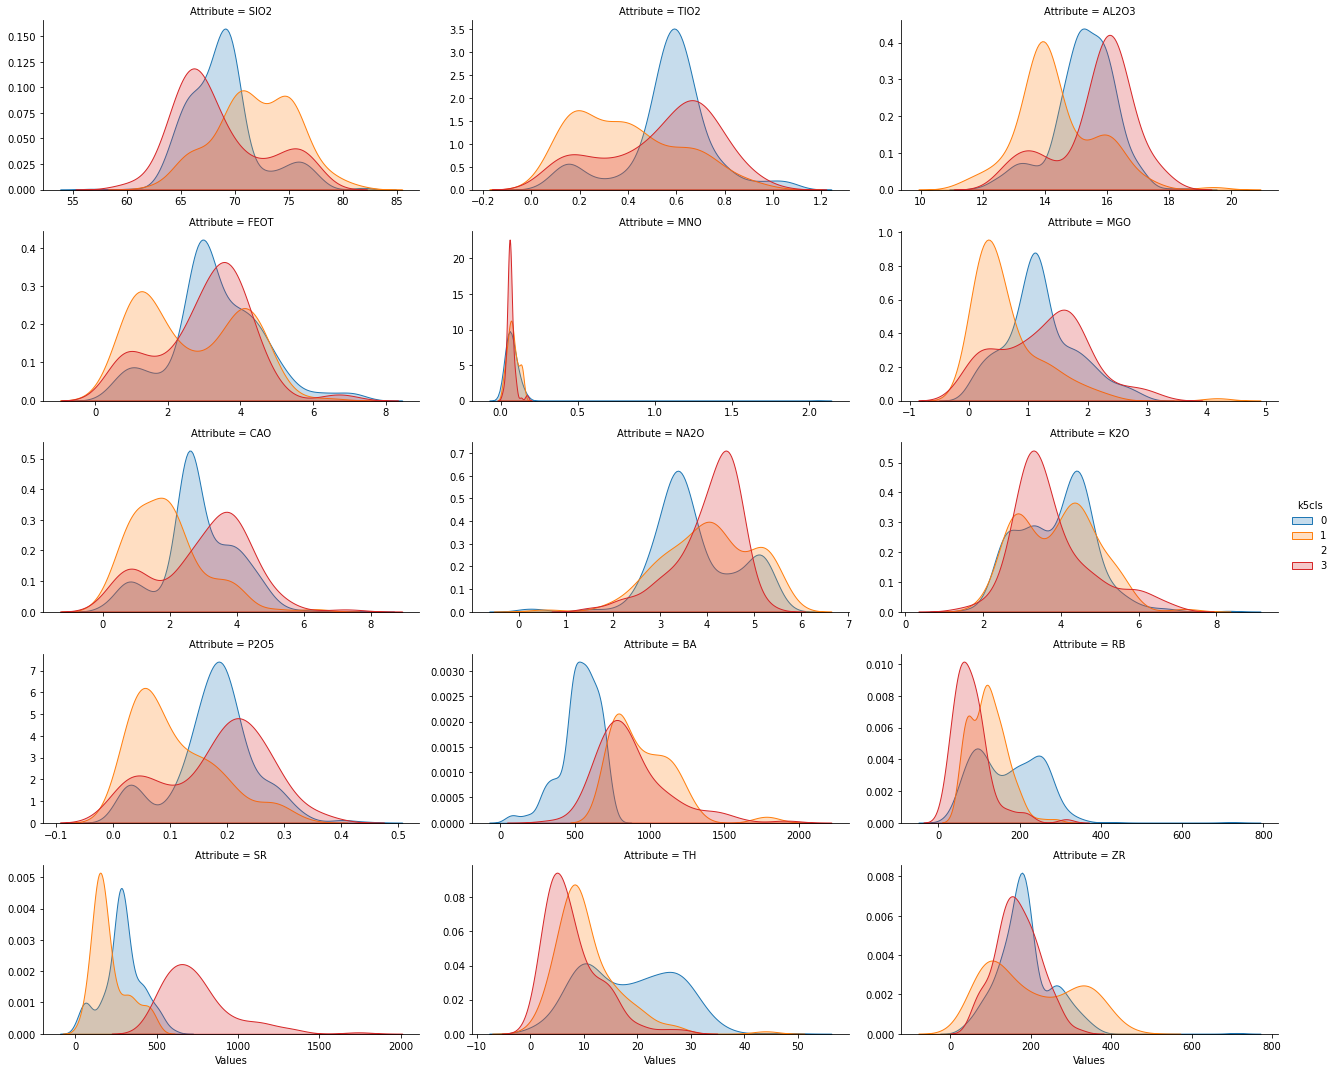

In [80]:
facets = seaborn.FacetGrid(data=tidy_db, col='Attribute', hue='k5cls', \
                  sharey=False, sharex=False, aspect=2, col_wrap=3)
# Build the plot from `sns.kdeplot`
_ = facets.map(seaborn.kdeplot, 'Values', shade=True).add_legend()

In [81]:
#Hierarchical Clustering

# Set seed for reproducibility
numpy.random.seed(0)
# Iniciate the algorithm
model = AgglomerativeClustering(linkage='ward', n_clusters=4)
# Run clustering
model.fit(X[cluster_variables])
# Assign labels to main data table
X['ward5'] =model.labels_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [82]:
ward5sizes = X.groupby('ward5').size()
ward5sizes

ward5
0    558
1     67
2      1
3     62
dtype: int64

In [83]:
ward5means = X.groupby('ward5')[cluster_variables].mean()
ward5means.T.round(3)

ward5,0,1,2,3
SIO2,68.905,69.497,65.575,72.994
TIO2,0.561,0.504,0.597,0.337
AL2O3,15.242,15.404,16.974,14.252
FEOT,3.366,2.760,3.566,1.934
MNO,0.077,0.060,0.057,0.064
MGO,1.181,1.054,1.692,0.685
CAO,2.867,2.617,3.962,1.661
NA2O,3.818,4.024,4.561,3.624
K2O,3.809,3.910,2.812,4.350
P2O5,0.173,0.171,0.204,0.099


In [84]:
# Index db on cluster ID
tidy_db = X.set_index('ward5')
# Keep only variables used for clustering
tidy_db = tidy_db[cluster_variables]
# Stack column names into a column, obtaining 
# a "long" version of the dataset
tidy_db = tidy_db.stack()
# Take indices into proper columns
tidy_db = tidy_db.reset_index()
# Rename column names
tidy_db = tidy_db.rename(columns={
                        'level_1': 'Attribute', 
                        0: 'Values'})
# Check out result
tidy_db.head()

,ward5,Attribute,Values
0,0,SIO2,69.144
1,0,TIO2,0.565
2,0,AL2O3,14.590
3,0,FEOT,4.261
4,0,MNO,0.081


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

/usr/local/lib/python3.7/dist-packages/seaborn/distribu

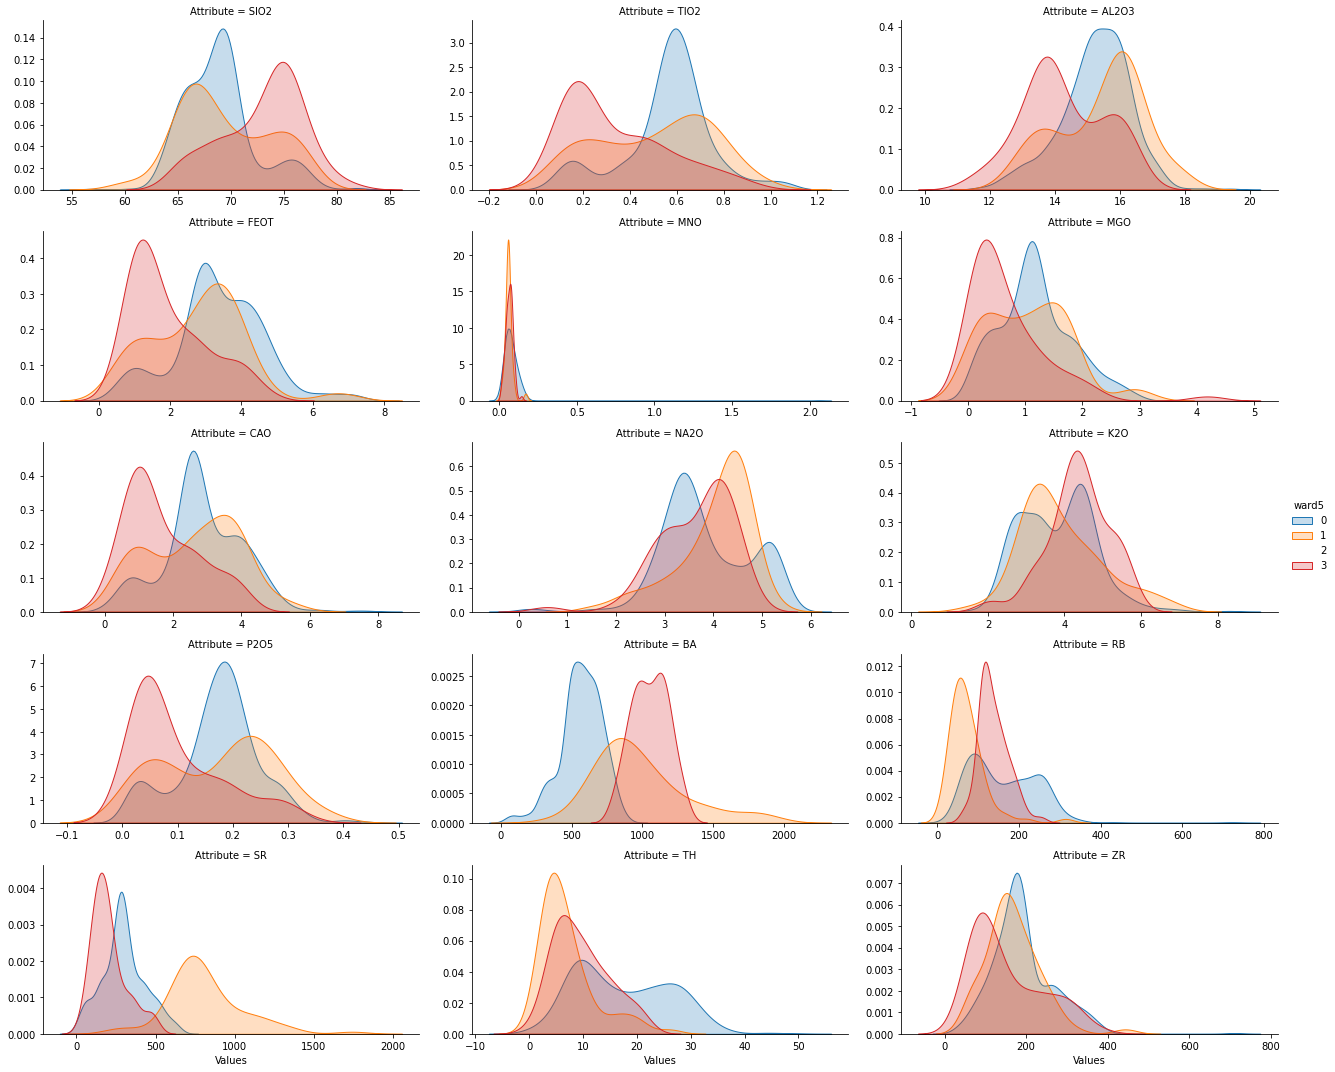

In [85]:
# Setup the facets
facets = seaborn.FacetGrid(data=tidy_db, col='Attribute', hue='ward5', \
                  sharey=False, sharex=False, aspect=2, col_wrap=3)
# Build the plot as a `sns.kdeplot`
_ = facets.map(seaborn.kdeplot, 'Values', shade=True).add_legend()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



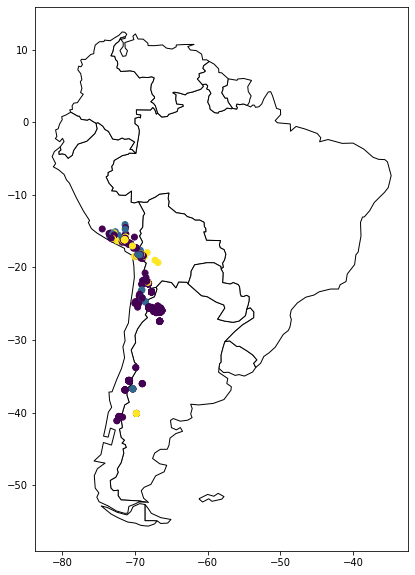

In [86]:
X['ward5'] =model.labels_


# Map


gdf = geopandas.GeoDataFrame(X, geometry=geopandas.points_from_xy(coordinates['LONGITUDE'],coordinates['LATITUDE']))
#print(gdf.head)

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
ax = world[world.continent == 'South America'].plot(
    color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
gdf.plot(column = 'ward5',ax=ax)

plt.show()

In [87]:


ax = axs[0]
geopandas.GeoDataFrame(X, geometry=geopandas.points_from_xy(coordinates['LONGITUDE'],coordinates['LATITUDE']))
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
ax = world[world.continent == 'South America'].plot(
    color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
gdf.plot(column = 'k5cls',ax=ax)
# Add title
ax.set_title('K-Means solution ($k=4$)')

#
ax = axs[1]
geopandas.GeoDataFrame(X, geometry=geopandas.points_from_xy(coordinates['LONGITUDE'],coordinates['LATITUDE']))
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
ax = world[world.continent == 'South America'].plot(
    color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
gdf.plot(column = 'ward5',ax=ax)
# Add title
ax.set_title('AHC solution ($k=4$)')

# Display the map
plt.show()

NameError: ignored

In [88]:
# Spatially Constrained Hierarchical Clustering

numpy.random.seed(123456)
model = AgglomerativeClustering(linkage='ward',
                                            n_clusters=4)
model.fit(X[cluster_variables])

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=4)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



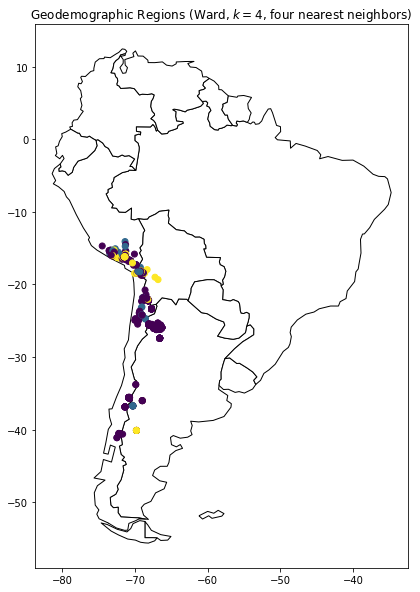

In [89]:
X['ward5wknn'] = model.labels_


geopandas.GeoDataFrame(X, geometry=geopandas.points_from_xy(coordinates['LONGITUDE'],coordinates['LATITUDE']))
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
ax = world[world.continent == 'South America'].plot(
    color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
gdf.plot(column = 'ward5wknn',ax=ax)
# Add title
plt.title('Geodemographic Regions (Ward, $k=4$, four nearest neighbors)')

# Display the map
plt.show()

In [90]:
cluster_variables = ['SIO2', 'TIO2', 'AL2O3', 'FEOT', 'MNO', 'MGO',
       'CAO', 'NA2O', 'K2O', 'P2O5', 'BA', 'RB', 'SR', 'TH', 'ZR']

data_all = df.dropna()
# Drop columns with less than 50% data 

limitPer = len(df) * .50
df = df.dropna(thresh=limitPer, axis=1)
df.columns

coordinates = data_all[['LONGITUDE','LATITUDE']]
X = data_all[cluster_variables]
#X = X.drop(['target'],axis = 1)

coordinates

,LONGITUDE,LATITUDE
0,-72.4930,-41.1000
1,-72.4930,-41.1000
2,-72.2060,-40.5088
3,-72.1812,-40.5275
4,-72.1743,-40.5675
...,...,...
3055,-69.2194,-18.2458
3056,-69.2125,-18.2167
3057,-69.2194,-18.2458
3061,-69.2431,-18.3014


In [91]:
X = data_all[cluster_variables]
X

,SIO2,TIO2,AL2O3,FEOT,MNO,MGO,CAO,NA2O,K2O,P2O5,BA,RB,SR,TH,ZR
0,69.144,0.565,14.590,4.261,0.081,1.111,3.544,4.402,2.141,0.162,550.0,69.1,190.0,8.60,282.0
1,63.541,0.796,16.427,5.973,0.121,1.732,5.136,4.562,1.460,0.252,396.0,45.6,294.0,4.30,195.0
2,70.931,0.340,13.794,4.671,0.140,0.310,1.771,5.182,2.791,0.070,747.0,62.0,138.0,8.30,307.0
3,70.047,0.688,14.039,4.367,0.110,0.638,2.154,5.195,2.612,0.150,776.0,73.0,161.0,9.18,342.0
4,69.367,0.531,14.150,5.167,0.150,0.471,2.213,5.167,2.664,0.120,692.0,66.0,197.0,8.82,308.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3055,75.549,0.205,13.303,1.201,0.051,0.185,0.893,3.880,4.681,0.051,296.0,146.0,157.0,18.40,108.0
3056,74.796,0.274,13.367,1.418,0.071,0.478,1.078,3.680,4.808,0.030,513.0,40.4,512.6,4.00,73.0
3057,75.237,0.258,13.388,1.419,0.072,0.381,1.051,3.545,4.607,0.041,638.0,146.0,147.0,16.30,121.0
3061,66.728,0.555,17.025,3.542,0.030,0.807,3.845,4.087,3.199,0.182,766.0,61.0,508.0,5.00,101.0


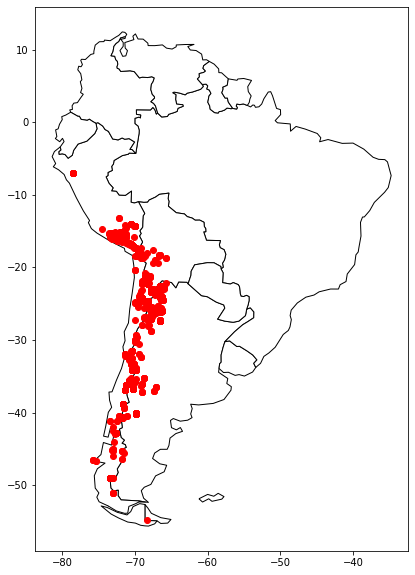

In [92]:
# Map

gdf = geopandas.GeoDataFrame(X, geometry=geopandas.points_from_xy(coordinates['LONGITUDE'],coordinates['LATITUDE']))
#print(gdf.head)

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
ax = world[world.continent == 'South America'].plot(
    color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='red')

plt.show()

In [93]:
# Initialise KMeans instance
kmeans = KMeans(n_clusters=3)

# Set the seed for reproducibility
numpy.random.seed(42)
# Run K-Means algorithm
k5cls = kmeans.fit(X[cluster_variables])

In [94]:
k5cls.labels_

array([0, 0, 0, ..., 0, 2, 2], dtype=int32)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



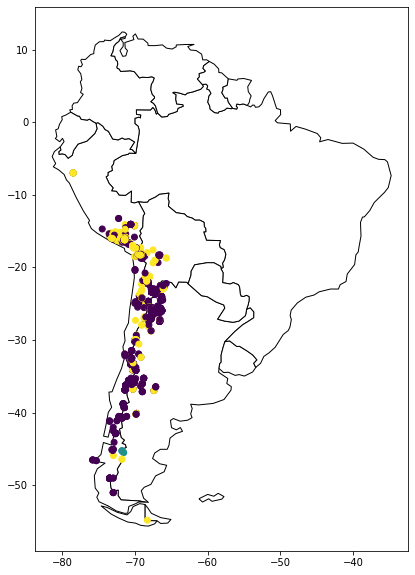

In [95]:
# Spatial Distribution of Clusters

# Assign labels to a column
X['k5cls'] = k5cls.labels_



# Map


gdf = geopandas.GeoDataFrame(X, geometry=geopandas.points_from_xy(coordinates['LONGITUDE'],coordinates['LATITUDE']))
#print(gdf.head)

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
ax = world[world.continent == 'South America'].plot(
    color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
gdf.plot(column = 'k5cls',ax=ax)

plt.show()

In [96]:
gdf

,SIO2,TIO2,AL2O3,FEOT,MNO,MGO,CAO,NA2O,K2O,P2O5,BA,RB,SR,TH,ZR,geometry,k5cls
0,69.144,0.565,14.590,4.261,0.081,1.111,3.544,4.402,2.141,0.162,550.0,69.1,190.0,8.60,282.0,POINT (-72.49300 -41.10000),0
1,63.541,0.796,16.427,5.973,0.121,1.732,5.136,4.562,1.460,0.252,396.0,45.6,294.0,4.30,195.0,POINT (-72.49300 -41.10000),0
2,70.931,0.340,13.794,4.671,0.140,0.310,1.771,5.182,2.791,0.070,747.0,62.0,138.0,8.30,307.0,POINT (-72.20600 -40.50880),0
3,70.047,0.688,14.039,4.367,0.110,0.638,2.154,5.195,2.612,0.150,776.0,73.0,161.0,9.18,342.0,POINT (-72.18120 -40.52750),0
4,69.367,0.531,14.150,5.167,0.150,0.471,2.213,5.167,2.664,0.120,692.0,66.0,197.0,8.82,308.0,POINT (-72.17430 -40.56750),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3055,75.549,0.205,13.303,1.201,0.051,0.185,0.893,3.880,4.681,0.051,296.0,146.0,157.0,18.40,108.0,POINT (-69.21940 -18.24580),0
3056,74.796,0.274,13.367,1.418,0.071,0.478,1.078,3.680,4.808,0.030,513.0,40.4,512.6,4.00,73.0,POINT (-69.21250 -18.21670),0
3057,75.237,0.258,13.388,1.419,0.072,0.381,1.051,3.545,4.607,0.041,638.0,146.0,147.0,16.30,121.0,POINT (-69.21940 -18.24580),0
3061,66.728,0.555,17.025,3.542,0.030,0.807,3.845,4.087,3.199,0.182,766.0,61.0,508.0,5.00,101.0,POINT (-69.24310 -18.30140),2


In [97]:
# Group data table by cluster label and count observations
k5sizes = X.groupby('k5cls').size()
k5sizes

k5cls
0    870
1      7
2    284
dtype: int64

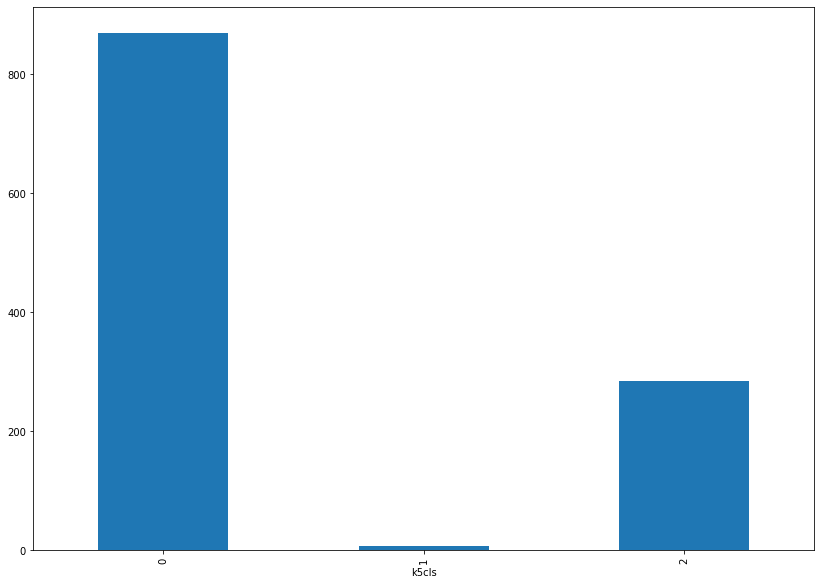

In [98]:
_ = k5sizes.plot.bar()

In [99]:
# Group table by cluster label, keep the variables used 
# for clustering, and obtain their descriptive summary
k5desc = gdf.groupby('k5cls')[cluster_variables].describe()
# Loop over each cluster and print a table with descriptives
for cluster in k5desc.T:
    print('\n\t---------\n\tCluster %i'%cluster)
    print(k5desc.T[cluster].unstack())


	---------
	Cluster 0
       count        mean         std  ...       50%        75%      max
SIO2   870.0   69.318839    3.931534  ...   69.0290   71.11250   84.999
TIO2   870.0    0.529847    0.225243  ...    0.5630    0.65200    1.472
AL2O3  870.0   15.213047    1.244803  ...   15.3060   16.00200   19.409
FEOT   870.0    3.282194    1.441326  ...    3.2100    4.23800   11.734
MNO    870.0    0.078566    0.077831  ...    0.0700    0.10100    2.062
MGO    870.0    1.156752    0.708004  ...    1.1190    1.62550    3.658
CAO    870.0    2.749077    1.358206  ...    2.6420    3.74250    7.721
NA2O   870.0    3.822586    1.039571  ...    3.6755    4.57400    7.937
K2O    870.0    3.681830    1.185362  ...    3.7535    4.49725   12.574
P2O5   870.0    0.167211    0.086601  ...    0.1730    0.21100    0.807
BA     870.0  542.637267  160.016070  ...  559.5000  652.75000  947.000
RB     870.0  158.429847  104.529312  ...  138.5000  213.00000  991.000
SR     870.0  277.540119  145.842687  ...

In [100]:
# Index db on cluster ID
tidy_db = gdf.set_index('k5cls')
# Keep only variables used for clustering
tidy_db = tidy_db[cluster_variables]
# Stack column names into a column, obtaining 
# a "long" version of the dataset
tidy_db = tidy_db.stack()
# Take indices into proper columns
tidy_db = tidy_db.reset_index()
# Rename column names
tidy_db = tidy_db.rename(columns={
                        'level_1': 'Attribute', 
                        0: 'Values'})
# Check out result
tidy_db.head()

,k5cls,Attribute,Values
0,0,SIO2,69.144
1,0,TIO2,0.565
2,0,AL2O3,14.590
3,0,FEOT,4.261
4,0,MNO,0.081


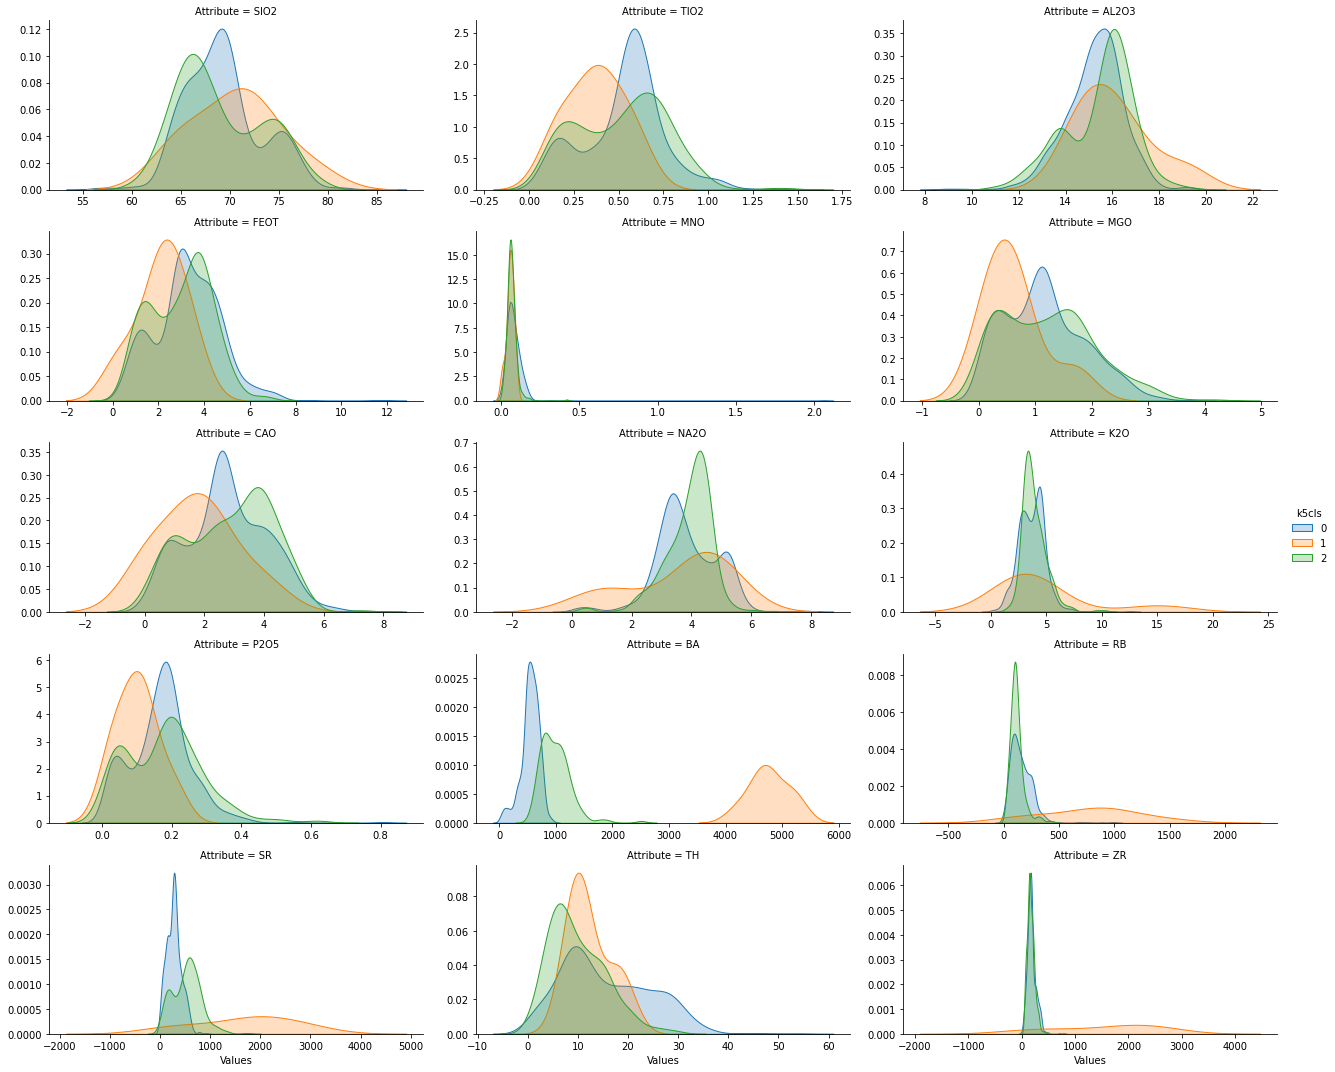

In [101]:
facets = seaborn.FacetGrid(data=tidy_db, col='Attribute', hue='k5cls', \
                  sharey=False, sharex=False, aspect=2, col_wrap=3)
# Build the plot from `sns.kdeplot`
_ = facets.map(seaborn.kdeplot, 'Values', shade=True).add_legend()

In [102]:
#Hierarchical Clustering

# Set seed for reproducibility
numpy.random.seed(0)
# Iniciate the algorithm
model = AgglomerativeClustering(linkage='ward', n_clusters=4)
# Run clustering
model.fit(X[cluster_variables])
# Assign labels to main data table
X['ward5'] =model.labels_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [103]:
ward5sizes = X.groupby('ward5').size()
ward5sizes

ward5
0    170
1      7
2    604
3    380
dtype: int64

In [104]:
ward5means = X.groupby('ward5')[cluster_variables].mean()
ward5means.T.round(3)

ward5,0,1,2,3
SIO2,70.352,70.530,70.563,66.622
TIO2,0.461,0.370,0.493,0.609
AL2O3,14.936,16.055,14.842,16.088
FEOT,2.682,2.127,3.016,3.745
MNO,0.061,0.056,0.077,0.079
MGO,1.047,0.620,0.882,1.691
CAO,2.331,1.744,2.245,3.808
NA2O,3.743,3.543,3.864,3.849
K2O,4.223,4.854,3.862,3.315
P2O5,0.164,0.100,0.155,0.196


In [105]:
# Index db on cluster ID
tidy_db = X.set_index('ward5')
# Keep only variables used for clustering
tidy_db = tidy_db[cluster_variables]
# Stack column names into a column, obtaining 
# a "long" version of the dataset
tidy_db = tidy_db.stack()
# Take indices into proper columns
tidy_db = tidy_db.reset_index()
# Rename column names
tidy_db = tidy_db.rename(columns={
                        'level_1': 'Attribute', 
                        0: 'Values'})
# Check out result
tidy_db.head()

,ward5,Attribute,Values
0,2,SIO2,69.144
1,2,TIO2,0.565
2,2,AL2O3,14.590
3,2,FEOT,4.261
4,2,MNO,0.081


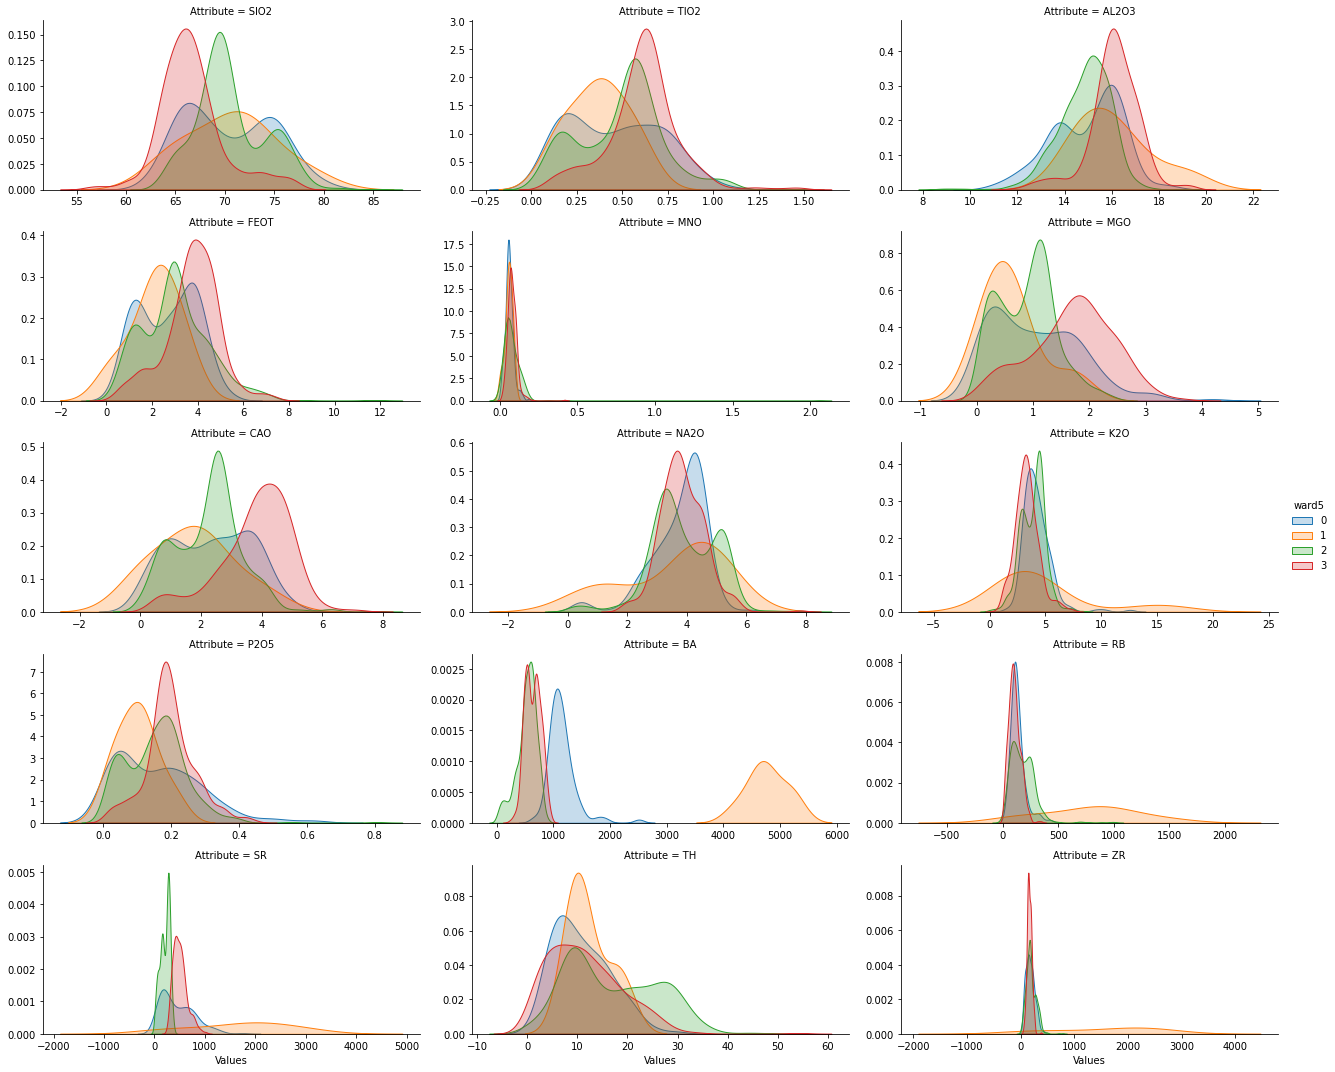

In [106]:
# Setup the facets
facets = seaborn.FacetGrid(data=tidy_db, col='Attribute', hue='ward5', \
                  sharey=False, sharex=False, aspect=2, col_wrap=3)
# Build the plot as a `sns.kdeplot`
_ = facets.map(seaborn.kdeplot, 'Values', shade=True).add_legend()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



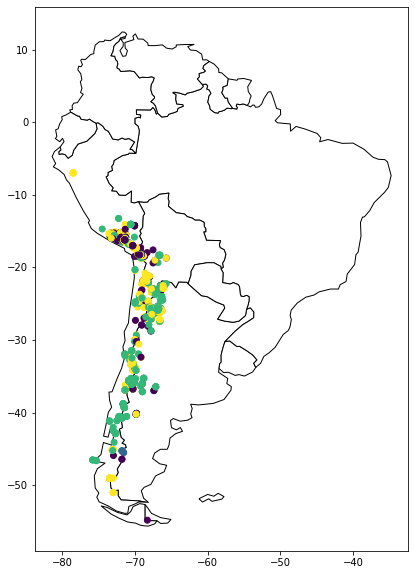

In [107]:
X['ward5'] =model.labels_


# Map


gdf = geopandas.GeoDataFrame(X, geometry=geopandas.points_from_xy(coordinates['LONGITUDE'],coordinates['LATITUDE']))
#print(gdf.head)

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
ax = world[world.continent == 'South America'].plot(
    color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
gdf.plot(column = 'ward5',ax=ax)

plt.show()

In [108]:


ax = axs[0]
geopandas.GeoDataFrame(X, geometry=geopandas.points_from_xy(coordinates['LONGITUDE'],coordinates['LATITUDE']))
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
ax = world[world.continent == 'South America'].plot(
    color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
gdf.plot(column = 'k5cls',ax=ax)
# Add title
ax.set_title('K-Means solution ($k=4$)')

#
ax = axs[1]
geopandas.GeoDataFrame(X, geometry=geopandas.points_from_xy(coordinates['LONGITUDE'],coordinates['LATITUDE']))
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
ax = world[world.continent == 'South America'].plot(
    color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
gdf.plot(column = 'ward5',ax=ax)
# Add title
ax.set_title('AHC solution ($k=4$)')

# Display the map
plt.show()

NameError: ignored

In [ ]:
# Spatially Constrained Hierarchical Clustering

numpy.random.seed(123456)
model = AgglomerativeClustering(linkage='ward',
                                            n_clusters=4)
model.fit(X[cluster_variables])

In [ ]:
X['ward5wknn'] = model.labels_


geopandas.GeoDataFrame(X, geometry=geopandas.points_from_xy(coordinates['LONGITUDE'],coordinates['LATITUDE']))
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
ax = world[world.continent == 'South America'].plot(
    color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
gdf.plot(column = 'ward5wknn',ax=ax)
# Add title
plt.title('Geodemographic Regions (Ward, $k=4$, four nearest neighbors)')

# Display the map
plt.show()

In [ ]:
##

In [ ]:
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.mixture import GaussianMixture

cluster_variables = cluster_variables = ['SIO2', 'TIO2', 'AL2O3', 'FEOT', 'MNO', 'MGO',
       'CAO', 'NA2O', 'K2O', 'P2O5', 'BA', 'RB', 'SR', 'TH', 'ZR']
X_new = X[cluster_variables]
y_new = X[['LATITUDE','LONGITUDE']]
y_new

In [ ]:

import pandas as pd # Reading csv file 
from shapely.geometry import Point # Shapely for converting latitude/longtitude to geometry
import geopandas as gpd 
# creating a geometry column 
geometry = [Point(xy) for xy in zip(y_new['LATITUDE'], y_new['LONGITUDE'])]

# Coordinate reference system : WGS84
crs = {'init': 'epsg:4326'}

# Creating a Geographic data frame 
gdf = gpd.GeoDataFrame(X, crs=crs, geometry=geometry)


In [ ]:
gdf.head()

In [ ]:
# Plot all points
gdf.plot(marker='o', color='b', markersize=0.5)

In [ ]:
!pip install rfpimp

In [ ]:
data_all

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:434: FutureWarning:

The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:434: FutureWarning:

The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:4

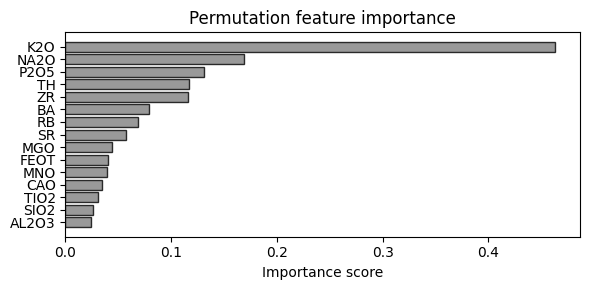

In [120]:
import rfpimp
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

######################################## Data preparation #########################################

cluster_variables = ['SIO2', 'TIO2', 'AL2O3', 'FEOT', 'MNO', 'MGO',
       'CAO', 'NA2O', 'K2O', 'P2O5', 'BA', 'RB', 'SR', 'TH', 'ZR']

X = coordinates[['LONGITUDE', 'LATITUDE']].values.reshape(-1,2)
Y = data_all[cluster_variables]

######################################## Train/test split #########################################

df_train, df_test = train_test_split(data_all, test_size=0.30)
df_train = df_train[cluster_variables]
df_test = df_test[cluster_variables]

X_train, y_train = Y, X
X_test, y_test = Y, X

################################################ Train #############################################

rf = RandomForestRegressor(n_estimators=100, n_jobs=-1)
rf.fit(X_train, y_train)

############################### Permutation feature importance #####################################

imp = rfpimp.importances(rf, X_test, y_test)

############################################## Plot ################################################

fig, ax = plt.subplots(figsize=(6, 3))

ax.barh(imp.index, imp['Importance'], height=0.8, facecolor='grey', alpha=0.8, edgecolor='k')
ax.set_xlabel('Importance score')
ax.set_title('Permutation feature importance')
ax.text(0.8, 0.15, '', fontsize=12, ha='center', va='center',
        transform=ax.transAxes, color='grey', alpha=0.5)
plt.gca().invert_yaxis()

fig.tight_layout()

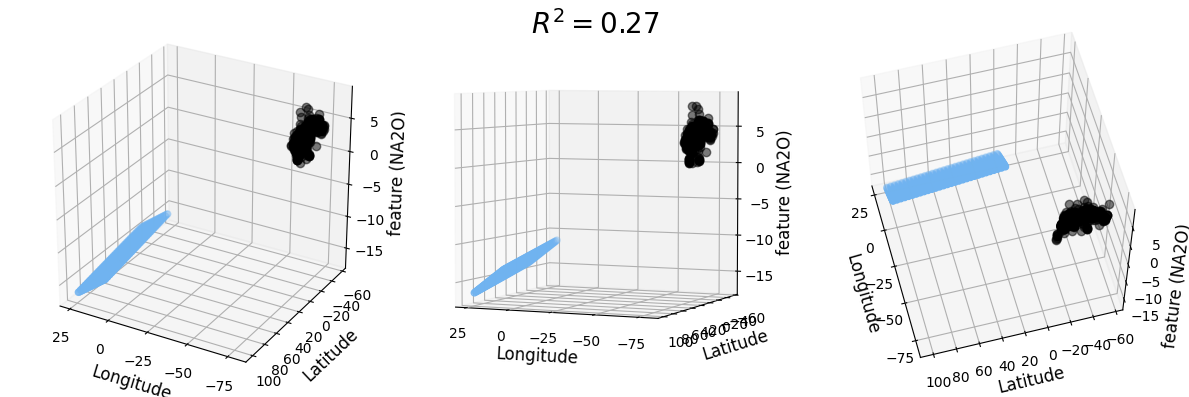

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D

######################################## Data preparation #########################################

cluster_variables = ['SIO2', 'TIO2', 'AL2O3', 'FEOT', 'MNO', 'MGO',
       'CAO', 'NA2O', 'K2O', 'P2O5', 'BA', 'RB', 'SR', 'TH', 'ZR']

X = coordinates[['LONGITUDE', 'LATITUDE']].values.reshape(-1,2)
Y = data_all['NA2O']

######################## Prepare model data point for visualization ###############################

x = X[:, 0]
y = X[:, 1]
z = Y

x_pred = np.linspace(6, 24, 30)   # range of porosity values
y_pred = np.linspace(0, 100, 30)  # range of brittleness values
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

################################################ Train #############################################

ols = linear_model.LinearRegression()
model = ols.fit(X, Y)
predicted = model.predict(model_viz)

############################################## Evaluate ############################################

r2 = model.score(X, Y)

############################################## Plot ################################################

plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('Longitude', fontsize=12)
    ax.set_ylabel('Latitude', fontsize=12)
    ax.set_zlabel('feature (NA2O)', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.text2D(0.2, 0.32, '', fontsize=13, ha='center', va='center',
           transform=ax1.transAxes, color='grey', alpha=0.5)
ax2.text2D(0.3, 0.42, '', fontsize=13, ha='center', va='center',
           transform=ax2.transAxes, color='grey', alpha=0.5)
ax3.text2D(0.85, 0.85, '', fontsize=13, ha='center', va='center',
           transform=ax3.transAxes, color='grey', alpha=0.5)

ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)

fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout()

**K MEANS**

In [ ]:
df2 = df
df2

In [ ]:
df2.dtypes

In [ ]:
df2['ROCK NAME'] = df2['ROCK NAME'].map({'dacite':0, 'rhyodacite':1, 'rhyolite':2, 'tuff':3, 'unknown':4})
df2

In [ ]:
df2 = df.drop(columns= ['IGSN', 'CRUISE ID', 'MIN AGE', 'AGE', 'MAX AGE', 'MINERAL'])
df2

In [ ]:
X = df2.iloc[:, 9:10]
X

In [ ]:
kmeans = KMeans(5)

In [ ]:
kmeans.fit(X)

In [ ]:
identified_clusters = kmeans.fit_predict(X)
identified_clusters

In [ ]:
df_cluster = df2.copy()
df_cluster['Cluster'] = identified_clusters
df_cluster

In [ ]:
plt.subplots(figsize = (20,7))
plt.scatter(df_cluster['LONGITUDE'], df_cluster['LATITUDE'], c=df_cluster['Cluster'], cmap='rainbow')
plt.xlim(-77.5, -64)
plt.ylim(-60,-10)
plt.show()

In [ ]:
dfSK = df2

In [ ]:
dfSK.dropna(subset = ["SIO2"], inplace=True)

In [ ]:
dfSK

In [ ]:
X1 = dfSK.iloc[:, 10:11]
X1

In [ ]:
kmeans = KMeans(4)

In [ ]:
kmeans.fit(X1)

In [ ]:
identified_clusters1 = kmeans.fit_predict(X1)
identified_clusters1

In [ ]:
df_cluster1 = dfSK.copy()
df_cluster1['Cluster1'] = identified_clusters1
df_cluster1

In [ ]:
plt.subplots(figsize = (20,7))
plt.scatter(df_cluster1['LONGITUDE'], df_cluster1['LATITUDE'], c=df_cluster1['Cluster1'], cmap='rainbow')
plt.xlim(-77.5, -64)
plt.ylim(-60,-10)
plt.show()